# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [3]:
# Import warnings
#!pip install matplotlib==3.10.0 --upgrade


   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ------ --------------------------------- 1.3/8.0 MB 9.2 MB/s eta 0:00:01
   --------------- ------------------------ 3.1/8.0 MB 9.2 MB/s eta 0:00:01
   -------------------------- ------------- 5.2/8.0 MB 9.2 MB/s eta 0:00:01
   --------------------------------- ------ 6.8/8.0 MB 9.1 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 8.9 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.1
    Uninstalling matplotlib-3.10.1:
      Successfully uninstalled matplotlib-3.10.1


  You can safely remove it manually.


In [1]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import geopandas as gpd
#import sys
#print(sys.executable)

In [2]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)
print("geopandas version:", gpd.__version__)

numpy version: 2.2.3
pandas version: 2.2.3
matplotlib version: 3.10.0
seaborn version: 0.13.2
geopandas version: 1.0.1


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [4]:
# Try loading one file
df= pd.read_parquet('C:/Users/Administrator/OneDrive/Desktop/Master ML and AI - Upgrad/EDA - Taxi Assignment/Datasets and Dictionary/trip_records/2023-1.parquet')
# df = pd.read_parquet('2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

In [4]:
# sampled_data is an empty DF to keep appending sampled data of each hour
sampled_data=pd.DataFrame()
# hour_data is the DF of entries for an hour 'X' on a date 'Y'
df['hour'] = df['tpep_pickup_datetime'].dt.hour #create a column by using the hour in datetime values
hour_data = df.groupby('hour') #create hour_data by grouping data for each unique hour of a day
#hour_data.head()

# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself
sample = hour_data.sample(frac = 0.05, random_state = 42)

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
sampled_data.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
784218          2  2023-01-10 00:44:09   2023-01-10 00:51:23              1.0   
1316921         1  2023-01-15 00:32:10   2023-01-15 00:42:27              1.0   
2732390         1  2023-01-29 00:29:35   2023-01-29 00:42:50              2.0   
1203249         2  2023-01-14 00:14:30   2023-01-14 00:27:04              1.0   
137926          2  2023-01-03 00:55:05   2023-01-03 01:03:28              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
784218            1.97         1.0                  N           142   
1316921           1.50         1.0                  N           113   
2732390           2.60         1.0                  N           263   
1203249           1.79         1.0                  N            79   
137926            3.34         1.0                  N           132   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
784218            164             1         10.7    1.0      0.5        3.14   
1316921            79             1         10.0    3.5      0.5        2.00   
2732390           143             1         15.6    3.5      0.5        4.10   
1203249           158             1         13.5    1.0      0.5        1.48   
137926            132             2         15.6    1.0      0.5        0.00   

         tolls_amount  improvement_surcharge  total_amount  \
784218            0.0                    1.0         18.84   
1316921           0.0                    1.0         17.00   
2732390           0.0                    1.0         24.70   
1203249           0.0                    1.0         19.98   
137926            0.0                    1.0         19.35   

         congestion_surcharge  airport_fee  hour  
784218                    2.5         0.00     0  
1316921                   2.5         0.00     0  
2732390                   2.5         0.00     0  
1203249                   2.5         0.00     0  
137926                    0.0         1.25     0

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [6]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [7]:
#from google.colab import drive
#drive.mount('/content/drive')

In [5]:
#test
# Set working directory
os.chdir('C:/Users/Administrator/OneDrive/Desktop/Master ML and AI - Upgrad/EDA - Taxi Assignment/Datasets and Dictionary/trip_records')

# List all .parquet files
file_list = [f for f in os.listdir() if f.endswith('.parquet')]

# Final dataframe to store all sampled data
final_df = pd.DataFrame()

# Loop through each file
for file_name in file_list:
    try:
        #print(f"Processing {file_name}...")
        df = pd.read_parquet(file_name)

        # Convert pickup time to datetime
        df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
        df['date'] = df['tpep_pickup_datetime'].dt.date
        df['hour'] = df['tpep_pickup_datetime'].dt.hour

        sampled_data = pd.DataFrame()

        # Loop over each date
        for date in df['date'].unique(): #looping through each day of a month
            daily_data = df[df['date'] == date] #Create a dataframe for each unique day

            # Loop over each hour of that date
            for hour in daily_data['hour'].unique(): #looping through each hour of a day
                hour_data = daily_data[daily_data['hour'] == hour] #Create a dataframe for each unique hour of a day

                # Sample 5% of the data from that hour
                if len(hour_data) > 0:
                    sample = hour_data.sample(frac=0.05, random_state=42)
                    sampled_data = pd.concat([sampled_data, sample])

        # Append this file’s sampled data to the final dataframe
        final_df = pd.concat([final_df, sampled_data])

    except Exception as e:
        print(f"Error processing file {file_name}: {e}")

In [6]:
final_df

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
428             2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1113            2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
819             2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3192            2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
2995263         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   
...           ...                  ...                   ...              ...   
2694411         2  2023-09-30 22:28:34   2023-09-30 22:33:41              2.0   
2698613         2  2023-09-30 22:35:58   2023-09-30 22:50:21              1.0   
2846082         2  2023-09-30 22:35:50   2023-09-30 22:43:17              NaN   
2696416         2  2023-09-30 22:59:21   2023-09-30 23:10:16              1.0   
2698522         2  2023-09-30 22:03:22   2023-09-30 22:06:26              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
428               7.74         1.0                  N           138   
1113              1.24         1.0                  N           161   
819               1.44         1.0                  N           237   
3192              0.54         1.0                  N           143   
2995263          19.24         NaN               None            66   
...                ...         ...                ...           ...   
2694411           0.86         1.0                  N           261   
2698613           3.56         1.0                  N           141   
2846082           1.38         NaN               None            50   
2696416           1.03         1.0                  N           142   
2698522           0.41         1.0                  N           239   

         DOLocationID  payment_type  ...  mta_tax  tip_amount  tolls_amount  \
428               256             2  ...      0.5        0.00           0.0   
1113              237             1  ...      0.5        2.58           0.0   
819               141             2  ...      0.5        0.00           0.0   
3192              142             2  ...      0.5        0.00           0.0   
2995263           107             0  ...      0.5        5.93           0.0   
...               ...           ...  ...      ...         ...           ...   
2694411            88             1  ...      0.5        3.05           0.0   
2698613            41             2  ...      0.5        0.00           0.0   
2846082            68             0  ...      0.5        3.70           0.0   
2696416           230             1  ...      0.5        3.14           0.0   
2698522           239             1  ...      0.5        2.02           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  \
428                        1.0         41.15                   0.0   
1113                       1.0         15.48                   2.5   
819                        1.0         16.40                   2.5   
3192                       1.0         11.50                   2.5   
2995263                    1.0         35.57                   NaN   
...                        ...           ...                   ...   
2694411                    1.0         15.25                   2.5   
2698613                    1.0         23.40                   2.5   
2846082                    1.0         22.18                   NaN   
2696416                    1.0         18.84                   2.5   
2698522                    1.0         12.12                   2.5   

         airport_fee        date  hour Airport_fee  
428             1.25  2023-01-01     0         NaN  
1113            0.00  2023-01-01     0         NaN  
819             0.00  2023-01-01     0         NaN  
3192            0.00  2023-01-01     0         NaN  
2995263          NaN  2023-01-01     0         NaN  
...              ...         ...   ...         ...  
2694411          NaN  

In [40]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('C:/Users/Administrator/OneDrive/Desktop/Master ML and AI - Upgrad/EDA - Taxi Assignment/Datasets and Dictionary/trip_records')

# List all .parquet files
file_list = os.listdir()

# Final dataframe to store all sampled data
final_df = pd.DataFrame()

# Loop through each file
for file_name in file_list:
    try:
        # Load the parquet file
        df = pd.read_parquet(file_name)

        # Convert to datetime and extract date and hour
        df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
        df['date'] = df['tpep_pickup_datetime'].dt.date #Create a date column from pickup_datetime
        df['hour'] = df['tpep_pickup_datetime'].dt.hour #Create an hour column from pickup_datetime

        # Container for this file's sampled data
        sampled_data = pd.DataFrame()

        # Loop over each date
        for date in df['date'].unique(): #looping through each day of a month
            daily_data = df[df['date'] == date] #Create a dataframe for each unique day

            # Loop over each hour of that date
            for hour in daily_data['hour'].unique(): #looping through each hour of a day
                hour_data = daily_data[daily_data['hour'] == hour] #Create a dataframe for each unique hour of a day

                # Sample 5% of the data from that hour
                if len(hour_data) > 0:
                    sample = hour_data.sample(frac=0.05, random_state=42)
                    sampled_data = pd.concat([sampled_data, sample])

        # Append this file’s sampled data to the final dataframe
        final_df = pd.concat([final_df, sampled_data])

    except Exception as e:
        print(f"Error processing file {file_name}: {e}")

Error processing file final_data.csv: Could not open Parquet input source '<Buffer>': Parquet magic bytes not found in footer. Either the file is corrupted or this is not a parquet file.


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [7]:
# Store the df in csv/parquet
final_df.to_csv('C:/Users/Administrator/OneDrive/Desktop/Master ML and AI - Upgrad/EDA - Taxi Assignment/final_data.csv')

In [8]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1896400 entries, 428 to 2698522
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            fl

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [4]:
# Load the new data file
data=pd.read_csv('C:/Users/Administrator/OneDrive/Desktop/Master ML and AI - Upgrad/EDA - Taxi Assignment/final_data.csv')
data.head()

Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0         428         2  2023-01-01 00:07:18   2023-01-01 00:23:15   
1        1113         2  2023-01-01 00:16:41   2023-01-01 00:21:46   
2         819         2  2023-01-01 00:14:03   2023-01-01 00:24:36   
3        3192         2  2023-01-01 00:24:30   2023-01-01 00:29:55   
4     2995263         2  2023-01-01 00:43:00   2023-01-01 01:01:00   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0              1.0           7.74         1.0                  N   
1              2.0           1.24         1.0                  N   
2              3.0           1.44         1.0                  N   
3              1.0           0.54         1.0                  N   
4              NaN          19.24         NaN                NaN   

   PULocationID  DOLocationID  ...  mta_tax  tip_amount  tolls_amount  \
0           138           256  ...      0.5        0.00           0.0   
1           161           237  ...      0.5        2.58           0.0   
2           237           141  ...      0.5        0.00           0.0   
3           143           142  ...      0.5        0.00           0.0   
4            66           107  ...      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         41.15                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         16.40                   2.5         0.00   
3                    1.0         11.50                   2.5         0.00   
4                    1.0         35.57                   NaN          NaN   

         date  hour  Airport_fee  
0  2023-01-01     0          NaN  
1  2023-01-01     0          NaN  
2  2023-01-01     0          NaN  
3  2023-01-01     0          NaN  
4  2023-01-01     0          NaN  

[5 rows x 23 columns]

In [63]:
# data.head()

In [ ]:
# data.info()

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [6]:
#Check the columns of the joined data
print(data.columns.tolist())

['Unnamed: 0', 'VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee', 'date', 'hour', 'Airport_fee']


In [5]:
# Fix the index and drop any columns that are not needed
data.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')
data.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         NaN                NaN            66           107   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             2  ...      0.5        0.00           0.0   
1             1  ...      0.5        2.58           0.0   
2             2  ...      0.5        0.00           0.0   
3             2  ...      0.5        0.00           0.0   
4             0  ...      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         41.15                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         16.40                   2.5         0.00   
3                    1.0         11.50                   2.5         0.00   
4                    1.0         35.57                   NaN          NaN   

         date  hour Airport_fee  
0  2023-01-01     0         NaN  
1  2023-01-01     0         NaN  
2  2023-01-01     0         NaN  
3  2023-01-01     0         NaN  
4  2023-01-01     0         NaN  

[5 rows x 22 columns]

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [6]:
# Combine the two airport fee columns
# Check if values are identical
comparison = data['airport_fee'] == data['Airport_fee']
print("Identical values:", comparison.all())

# Preview mismatches
print(data[~comparison][['airport_fee', 'Airport_fee']].head())

Identical values: False
   airport_fee  Airport_fee
0         1.25          NaN
1         0.00          NaN
2         0.00          NaN
3         0.00          NaN
4          NaN          NaN


In [7]:
data['airport_fee'] = data['airport_fee'].combine_first(data['Airport_fee'])
data.drop(columns=['Airport_fee'], inplace=True)

In [8]:
print(data.columns.tolist())

['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee', 'date', 'hour']


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [9]:
# check where values of fare amount are negative
# Filter rows where fare_amount is negative
negative_fares = data[data['fare_amount'] < 0]

# Preview the result
print(negative_fares)

# Check how many such rows exist
print("Number of negative fare amounts:", len(negative_fares))

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee, date, hour]
Index: []

[0 rows x 21 columns]
Number of negative fare amounts: 0


Did you notice something different in the `RatecodeID` column for above records?

In [10]:
# Analyse RatecodeID for the negative fare amounts
ratecode_counts = negative_fares['RatecodeID'].value_counts().sort_index()
print("Count of negative fare_amount by RatecodeID:")
print(ratecode_counts)

Count of negative fare_amount by RatecodeID:
Series([], Name: count, dtype: int64)


In [10]:
# Find which columns have negative values
numeric_df = data.select_dtypes(include='number')
negative_cols = numeric_df.columns[(numeric_df < 0).any()].tolist()
print("Columns with negative values:", negative_cols)

Columns with negative values: ['extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']


In [11]:
# fix these negative values
negatives = ['extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee'] #define the columns that have negative values to be fixed

data[negatives] = data[negatives].abs() #replace negative values by their absolute value

In [12]:
#re-check
numeric_df = data.select_dtypes(include='number')
negative_cols = numeric_df.columns[(numeric_df < 0).any()].tolist()
print("Columns with negative values:", negative_cols)

Columns with negative values: []


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [13]:
# Find the proportion of missing values in each column
missing=data.isna().mean().sort_values(ascending=False)

print(missing)

passenger_count          0.034209
airport_fee              0.034209
congestion_surcharge     0.034209
store_and_fwd_flag       0.034209
RatecodeID               0.034209
trip_distance            0.000000
tpep_dropoff_datetime    0.000000
tpep_pickup_datetime     0.000000
VendorID                 0.000000
payment_type             0.000000
fare_amount              0.000000
PULocationID             0.000000
DOLocationID             0.000000
mta_tax                  0.000000
extra                    0.000000
tip_amount               0.000000
tolls_amount             0.000000
total_amount             0.000000
improvement_surcharge    0.000000
date                     0.000000
hour                     0.000000
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [42]:
# Display the rows with null values
data_null=data[data.isna()]
print(data_null)

# Impute NaN values in 'passenger_count'
median_passenger_count = data['passenger_count'].median() #calculate the median value of passenger column
data['passenger_count'].fillna(median_passenger_count) #fill NA values with median of the column
#print(data['passenger_count'].isna().sum())

         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0             NaN                  NaN                   NaN              NaN   
1             NaN                  NaN                   NaN              NaN   
2             NaN                  NaN                   NaN              NaN   
3             NaN                  NaN                   NaN              NaN   
4             NaN                  NaN                   NaN              NaN   
...           ...                  ...                   ...              ...   
1896395       NaN                  NaN                   NaN              NaN   
1896396       NaN                  NaN                   NaN              NaN   
1896397       NaN                  NaN                   NaN              NaN   
1896398       NaN                  NaN                   NaN              NaN   
1896399       NaN                  NaN                   NaN              NaN   

         trip_distance  Rat

0          1.0
1          2.0
2          3.0
3          1.0
4          1.0
          ... 
1896395    2.0
1896396    1.0
1896397    1.0
1896398    1.0
1896399    1.0
Name: passenger_count, Length: 1896400, dtype: float64

Did you find zeroes in passenger_count? Handle these.

In [43]:
valid_median = data.loc[data['passenger_count'] > 0, 'passenger_count'].median() #finding median of passenger data without zero values
data['passenger_count'] = data['passenger_count'].replace(0, valid_median) #replace zeros with new median

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [44]:
# Fix missing values in 'RatecodeID' with the most common Rate code
most_common_code = data['RatecodeID'].mode()[0]  # Usually 1 = Standard rate
data['RatecodeID'] = data['RatecodeID'].fillna(most_common_code) #fill missing values

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [45]:
# handle null values in congestion_surcharge
mask_missing = data['congestion_surcharge'].isna() #masking the missing data in congestion surcharge
mask_after_policy = data['tpep_pickup_datetime'] >= '2019-01-01' #masking the missing data in congestion surcharge with pickup datetime

# Apply $2.75 only where appropriate
data.loc[mask_missing & mask_after_policy, 'congestion_surcharge'] = 2.75
data['congestion_surcharge'] = data['congestion_surcharge'].fillna(0)  # rest get 0

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [24]:
shapefile_path = 'C:/Users/Administrator/OneDrive/Desktop/Master ML and AI - Upgrad/EDA - Taxi Assignment/Datasets and Dictionary/taxi_zones/taxi_zones.shp'

zones_gdf = gpd.read_file(shapefile_path)
print(zones_gdf.head())

   OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...  


In [46]:
print(zones_gdf.columns)

Index(['OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone', 'LocationID', 'borough',
       'geometry'],
      dtype='object')


In [48]:
data = data.merge(
    zones_gdf[['LocationID', 'zone', 'borough']].rename(columns={
        'LocationID': 'PULocationID',
        'zone': 'PUZone',
        'borough': 'PUBorough'
    }),
    on='PULocationID',
    how='left'
)

In [49]:
data = data.merge(
    zones_gdf[['LocationID', 'zone', 'borough']].rename(columns={
        'LocationID': 'DOLocationID',
        'zone': 'DOZone',
        'borough': 'DOBorough'
    }),
    on='DOLocationID',
    how='left'
)

In [50]:
print(data)

         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1               2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2               2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3               2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4               2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   
...           ...                  ...                   ...              ...   
1897077         2  2023-09-30 22:28:34   2023-09-30 22:33:41              2.0   
1897078         2  2023-09-30 22:35:58   2023-09-30 22:50:21              1.0   
1897079         2  2023-09-30 22:35:50   2023-09-30 22:43:17              NaN   
1897080         2  2023-09-30 22:59:21   2023-09-30 23:10:16              1.0   
1897081         2  2023-09-30 22:03:22   2023-09-30 22:06:26              1.0   

         trip_distance  Rat

In [51]:
#Handle any remaining missing values
#Check if there are still missing data
#missing1=data.isna().mean().sort_values(ascending=False)

#print(missing1)

#filling missing for airport fee
data['airport_fee'] = data.apply(
    lambda row: 1.25 if pd.isna(row['airport_fee']) and row['PUZone'] in ['JFK Airport', 'LaGuardia Airport']
    else (0.0 if pd.isna(row['airport_fee']) else row['airport_fee']),
    axis=1
)

#Fill missing with 'N' for the store and fwd flag values
data['store_and_fwd_flag'] = data['store_and_fwd_flag'].fillna('N')

#then re-check
print("Remaining missing in airport_fee:", data['airport_fee'].isna().sum())
print("Remaining missing in store_and_fwd_flag:", data['store_and_fwd_flag'].isna().sum())

Remaining missing in airport_fee: 0
Remaining missing in store_and_fwd_flag: 0


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [52]:
numeric_cols = [
    'passenger_count', 'trip_distance', 'payment_type', 'fare_amount',
    'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
    'improvement_surcharge', 'total_amount',
    'congestion_surcharge', 'airport_fee'
]

numeric_data = data[numeric_cols]

In [53]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
#print(data.describe(include='all'))

#Masking the outliers in columns
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers outside [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
outlier_mask = ((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR)))
outlier_counts = outlier_mask.sum().sort_values(ascending=False)

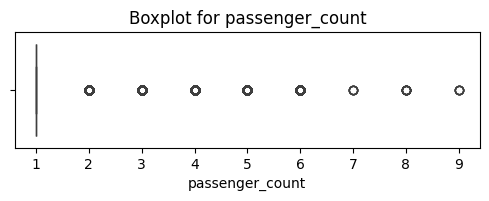

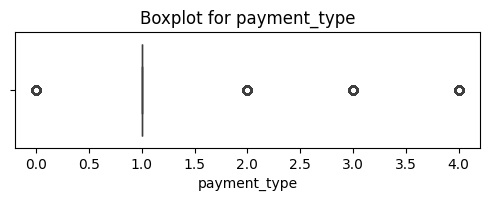

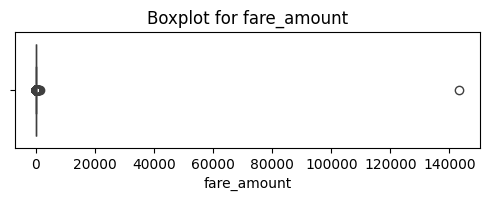

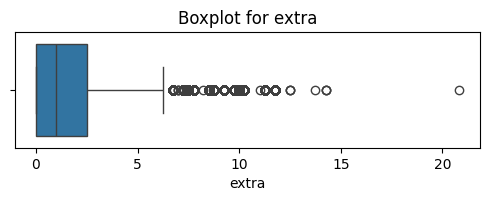

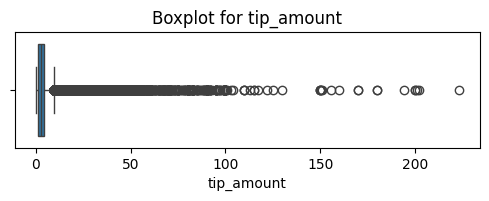

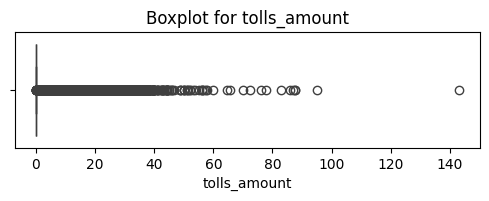

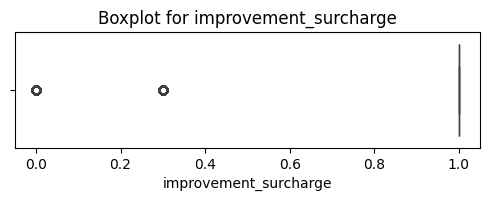

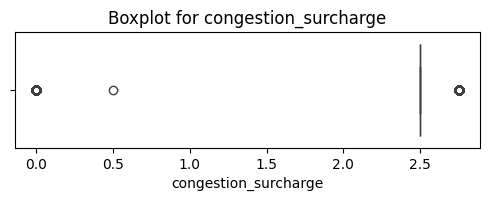

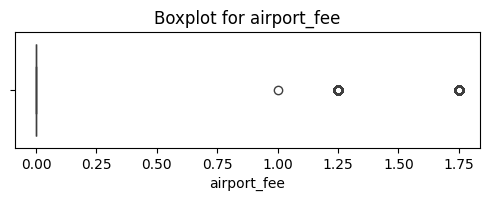

In [27]:
#Plot boxplots to visualise the outliers
for col in numeric_cols:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=numeric_data[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [54]:
# remove passenger_count > 6
data = data[data['passenger_count'] <= 6].reset_index(drop=True)

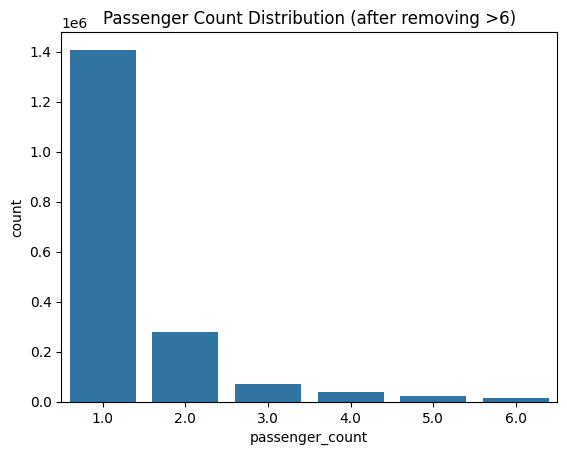

In [55]:
#plot to see the distribution after removing >6 passenger count
sns.countplot(x='passenger_count', data=data)
plt.title('Passenger Count Distribution (after removing >6)')
plt.show()

In [56]:
# for col in data:
#     print(col)

In [57]:
# Continue with outlier handling
# Ensure PUZone and DOZone are strings and not NaN
data['PUZone'] = data['PUZone'].fillna('')
data['DOZone'] = data['DOZone'].fillna('')

# 1. trip_distance ≈ 0 and fare_amount > 300
mask_high_fare_zero_dist = (data['trip_distance'] < 0.1) & (data['fare_amount'] > 300)

# 2. trip_distance = 0 and fare_amount = 0, but different zones
mask_zero_fare_moved = (
    (data['trip_distance'] == 0) &
    (data['fare_amount'] == 0) &
    (data['PUZone'] != data['DOZone'])
)

# 3. trip_distance > 250
mask_long_trip = data['trip_distance'] > 250

# 4. payment_type == 0
mask_invalid_payment = data['payment_type'] == 0

# ✅ Combine safely
outlier_mask = mask_high_fare_zero_dist | mask_zero_fare_moved | mask_long_trip | mask_invalid_payment
outlier_mask

0          False
1          False
2          False
3          False
4          False
           ...  
1832153    False
1832154    False
1832155    False
1832156    False
1832157    False
Length: 1832158, dtype: bool

In [62]:
data_cleaned = data[~outlier_mask].reset_index(drop=True)

In [4]:
#Save data cleaned to a csv file
#data_cleaned.to_csv('C:/Users/Administrator/OneDrive/Desktop/Master ML and AI - Upgrad/EDA - Taxi Assignment/Pre_cleaned_data.csv')
#Load saved data
data_cleaned=pd.read_csv('C:/Users/Administrator/OneDrive/Desktop/Master ML and AI - Upgrad/EDA - Taxi Assignment/Pre_cleaned_data.csv')
#Drop the unused first column
data_cleaned.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')

In [34]:
# Do any columns need standardising?
#Re-check the cleaned data
numeric_data_check = data_cleaned[numeric_cols]
Q1 = numeric_data_check.quantile(0.25)
Q3 = numeric_data_check.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers outside [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
outlier_mask_check = ((numeric_data_check < (Q1 - 1.5 * IQR)) | (numeric_data_check > (Q3 + 1.5 * IQR)))
outlier_counts_check = outlier_mask_check.sum().sort_values(ascending=False)

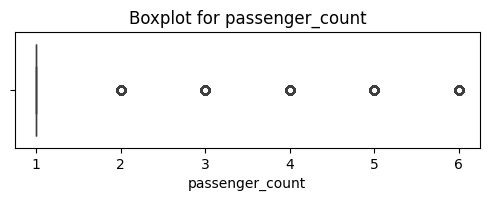

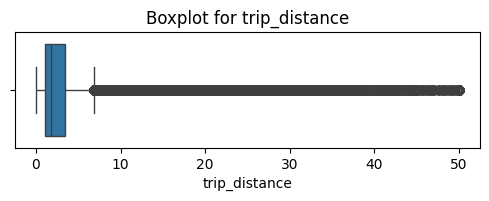

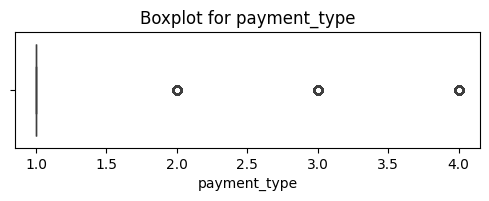

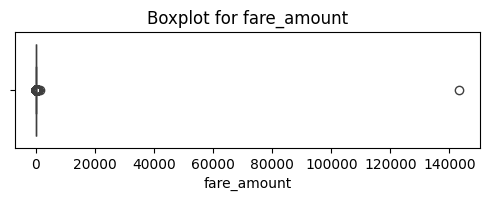

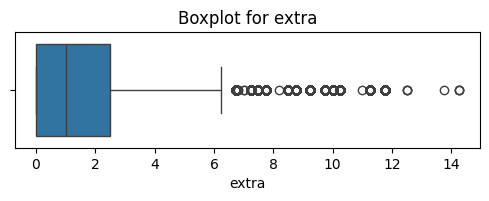

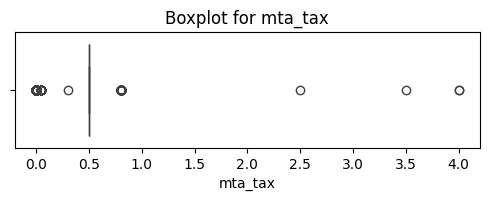

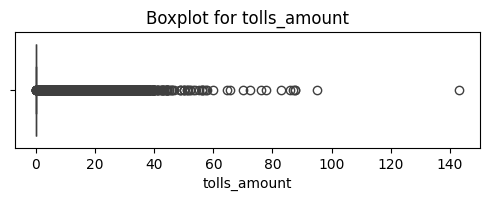

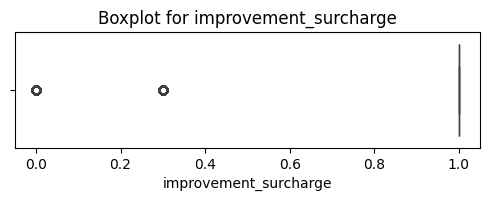

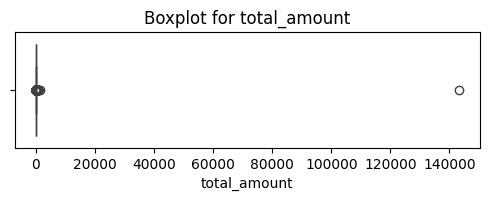

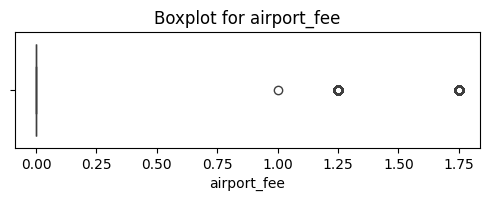

In [54]:
#Plot boxplots to visualise the outliers after cleaned
for col in numeric_cols:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=numeric_data_check[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

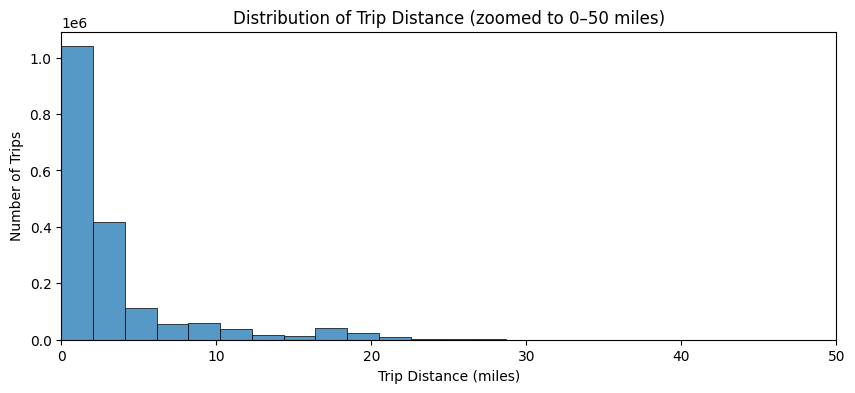

In [37]:
#Plot the distribution of trip distance
plt.figure(figsize=(10, 4))
sns.histplot(data_cleaned['trip_distance'], bins=100, kde=False)
plt.xlim(0, 50)  # Set the limit for x axis
plt.title('Distribution of Trip Distance (zoomed to 0–50 miles)')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Number of Trips')
plt.show()

In [38]:
#Describe the tip_amount and tolls_amount
print(data_cleaned['tip_amount'].describe())
print(data_cleaned['tolls_amount'].describe())

count    1.832045e+06
mean     3.572984e+00
std      4.069765e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.860000e+00
75%      4.450000e+00
max      2.230800e+02
Name: tip_amount, dtype: float64
count    1.832045e+06
mean     5.960985e-01
std      2.184261e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.430000e+02
Name: tolls_amount, dtype: float64


In [39]:
#Remove outliers for tip_amount and tolls_amount
data_cleaned['tip_amount'] = data_cleaned['tip_amount'].clip(upper=50)
data_cleaned['tolls_amount'] = data_cleaned['tolls_amount'].clip(upper=30)

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [40]:
data_cleaned.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'date',
 'hour',
 'PUZone',
 'PUBorough',
 'DOZone',
 'DOBorough']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

In [41]:
#Ensure Both Columns Are Datetime
data_cleaned['tpep_pickup_datetime'] = pd.to_datetime(data_cleaned['tpep_pickup_datetime'])
data_cleaned['tpep_dropoff_datetime'] = pd.to_datetime(data_cleaned['tpep_dropoff_datetime'])

#Calculate trip_duration in Minutes and make sure duration has no negative values
data_cleaned['trip_duration'] = abs((data_cleaned['tpep_dropoff_datetime'] - data_cleaned['tpep_pickup_datetime']).dt.total_seconds() / 60)

In [11]:
# List of all relevant columns (from your dataset)
variables = [
    'VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
    'passenger_count', 'trip_distance', 'RatecodeID',
    'PULocationID', 'DOLocationID', 'payment_type',
    'hour', 'trip_duration',
    'fare_amount', 'extra', 'mta_tax', 'tip_amount',
    'tolls_amount', 'improvement_surcharge', 'total_amount',
    'congestion_surcharge', 'airport_fee'
]

# Extract dtypes
data_subset = data_cleaned[variables]
dtypes = data_subset.dtypes

# Separate categories
numerical_vars = []
categorical_vars = []
datetime_vars = []

for var in variables:
    dtype = dtypes[var]
    
    if pd.api.types.is_datetime64_any_dtype(dtype):
        datetime_vars.append(var)
    elif pd.api.types.is_numeric_dtype(dtype):
        # Treat specific known fields as categorical even if int (e.g., IDs)
        if var in ['VendorID', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type', 'hour']:
            categorical_vars.append(var)
        else:
            numerical_vars.append(var)
    else:
        categorical_vars.append(var)

# Output
print("Numerical Variables:\n", numerical_vars)
print("\nCategorical Variables:\n", categorical_vars)
print("\nDatetime Variables:\n", datetime_vars)

Numerical Variables:
 ['passenger_count', 'trip_distance', 'trip_duration', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']

Categorical Variables:
 ['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type', 'hour']

Datetime Variables:
 []


##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [13]:
# Find and show the hourly trends in taxi pickups
hourly_pickup= data_cleaned.groupby('hour').agg(
    pickup_count=('PULocationID','count')
).reset_index()

# Pickup Trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_pickup, x='hour', y='pickup_count', marker='o')
plt.title("Hourly Pickup Trends")
plt.xlabel("Hour of Day")
plt.ylabel("Pickup Counts")
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

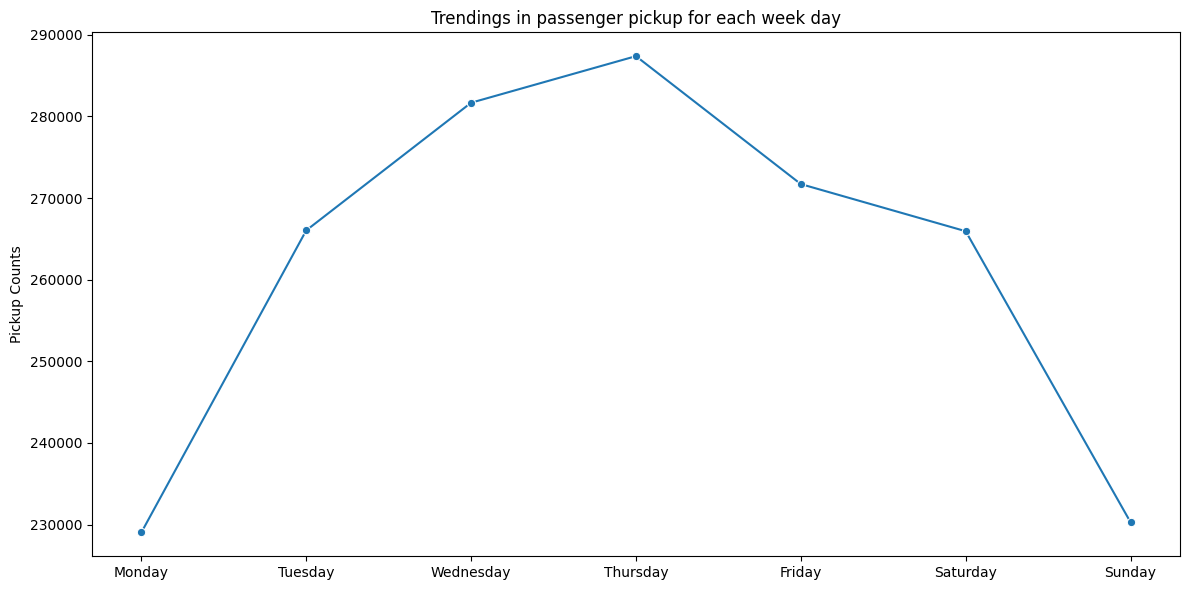

In [18]:
# Find and show the daily trends in taxi pickups (days of the week)
#check wether or not the pick up datetime is in right format
data_cleaned['tpep_pickup_datetime']=pd.to_datetime(data_cleaned['tpep_pickup_datetime'])
#assign day of week to a new data column using pickup datetime
data_cleaned['day_of_week'] = data_cleaned['tpep_pickup_datetime'].dt.dayofweek

#mapping and apply mapping day of week
# Define mapping from number to day name
day_map = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}
# Apply mapping
data_cleaned['day_name'] = data_cleaned['day_of_week'].map(day_map)

days_pickup = data_cleaned.groupby('day_name').agg(
    pickup_count=('PULocationID','count')
).reset_index()

# Define calendar order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Apply as ordered categorical
days_pickup['day_name'] = pd.Categorical(
    days_pickup['day_name'],
    categories=day_order,
    ordered=True
)

# Pickup Trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=days_pickup, x='day_name', y='pickup_count',marker='o')
plt.title("Trendings in passenger pickup for each week day")
plt.xlabel("")
plt.ylabel("Pickup Counts")
plt.tight_layout()
plt.show()

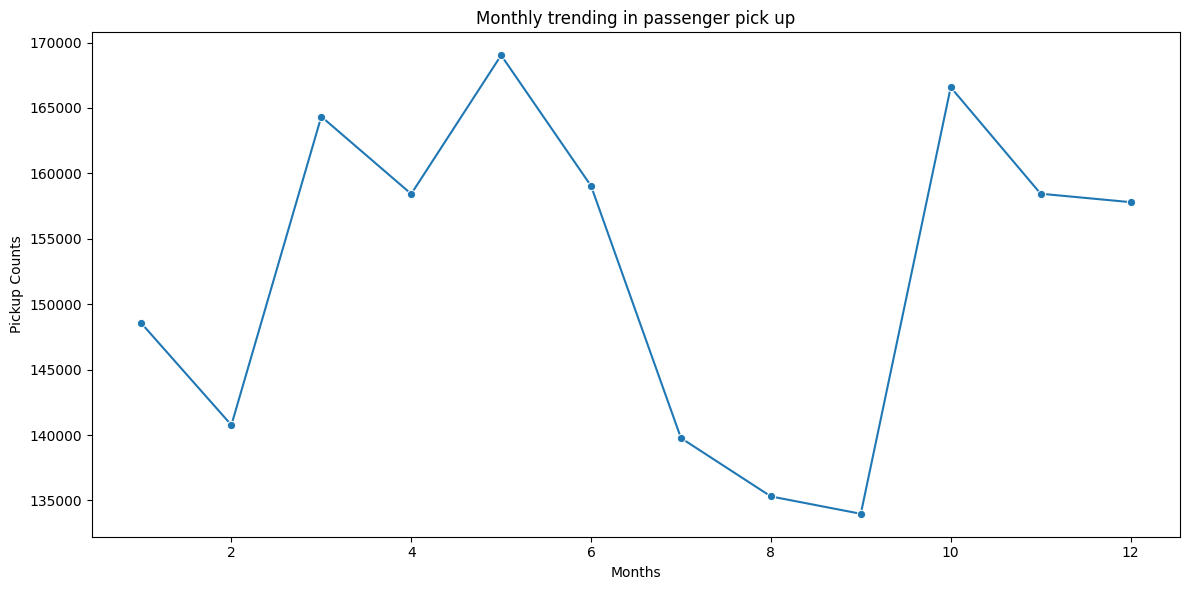

In [21]:
# Show the monthly trends in pickups
#assign months to a new data column using pickup datetime
data_cleaned['months'] = data_cleaned['tpep_pickup_datetime'].dt.month

monthly_pickup = data_cleaned.groupby('months').agg(
    pickup_count=('PULocationID','count')
).reset_index()

# Pickup Trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_pickup, x='months', y='pickup_count',marker='o')
plt.title("Monthly trending in passenger pick up")
plt.xlabel("Months")
plt.ylabel("Pickup Counts")
plt.tight_layout()
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [43]:
# Analyse the above parameters
#fare_amount
fare_zeros = (data_cleaned['fare_amount'] == 0).sum()
fare_negatives = (data_cleaned['fare_amount'] < 0).sum()
#print(f"fare_amount — Zeros: {fare_zeros}, Negatives: {fare_negatives}")

#tip_amount
tip_zeros = (data_cleaned['tip_amount'] == 0).sum()
tip_negatives = (data_cleaned['tip_amount'] < 0).sum()
#print(f"tip_amount — Zeros: {tip_zeros}, Negatives: {tip_negatives}")

#total_amount
total_zeros = (data_cleaned['total_amount'] == 0).sum()
total_negatives = (data_cleaned['total_amount'] < 0).sum()
#print(f"total_amount — Zeros: {total_zeros}, Negatives: {total_negatives}")

#trip_distance
dist_zeros = (data_cleaned['trip_distance'] == 0).sum()
dist_negatives = (data_cleaned['trip_distance'] < 0).sum()
#print(f"trip_distance — Zeros: {dist_zeros}, Negatives: {dist_negatives}")

summary = pd.DataFrame({
    "Zeros": [
        fare_zeros, tip_zeros, total_zeros, dist_zeros
    ],
    "Negatives": [
        fare_negatives, tip_negatives, total_negatives, dist_negatives
    ]
}, index=["fare_amount", "tip_amount", "total_amount", "trip_distance"])

#Combine findings into a summary table
print("\n Summary of Zero and Negative Values:")
print(summary)


 Summary of Zero and Negative Values:
                Zeros  Negatives
fare_amount       577          0
tip_amount     410730          0
total_amount      256          0
trip_distance   22968          0


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [18]:
# Create a df with non zero entries for the selected parameters.
# Define the fields to filter on
zero_filter_cols = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

# Create a cleaned copy excluding rows where any of these are zero
cleaned_copy = data_cleaned[~(data_cleaned[zero_filter_cols] == 0).any(axis=1)].copy()
cleaned_copy.to_csv('C:/Users/Administrator/OneDrive/Desktop/Master ML and AI - Upgrad/EDA - Taxi Assignment/Clean_data.csv')

In [ ]:
#read csv
cleaned_copy=pd.read_csv('C:/Users/Administrator/OneDrive/Desktop/Master ML and AI - Upgrad/EDA - Taxi Assignment/Clean_data.csv')

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [20]:
# Group data by month and analyse monthly revenue
cleaned_copy['tpep_pickup_datetime']=pd.to_datetime(cleaned_copy['tpep_pickup_datetime'])
#create a month column from date_time
cleaned_copy['month'] = cleaned_copy['tpep_pickup_datetime'].dt.to_period('M')
#Group by Month and Calculate Revenue Metrics
monthly_revenue = cleaned_copy.groupby('month').agg({
    'total_amount': 'sum'
}).reset_index()

# Convert period to string for plotting
monthly_revenue['month'] = monthly_revenue['month'].astype(str)
print(monthly_revenue)

      month  total_amount
0   2022-12         13.50
1   2023-01    3217558.61
2   2023-02    3060544.75
3   2023-03    3688529.42
4   2023-04    3572563.39
5   2023-05    3928269.03
6   2023-06    3679097.01
7   2023-07    3118494.51
8   2023-08    3017806.09
9   2023-09    3186781.67
10  2023-10    3972154.82
11  2023-11    3728114.22
12  2023-12    3630261.30


C:\Users\Administrator\AppData\Local\Temp\ipykernel_20776\969622326.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_filtered, x='month', y='total_amount', palette='Blues', edgecolor='black')


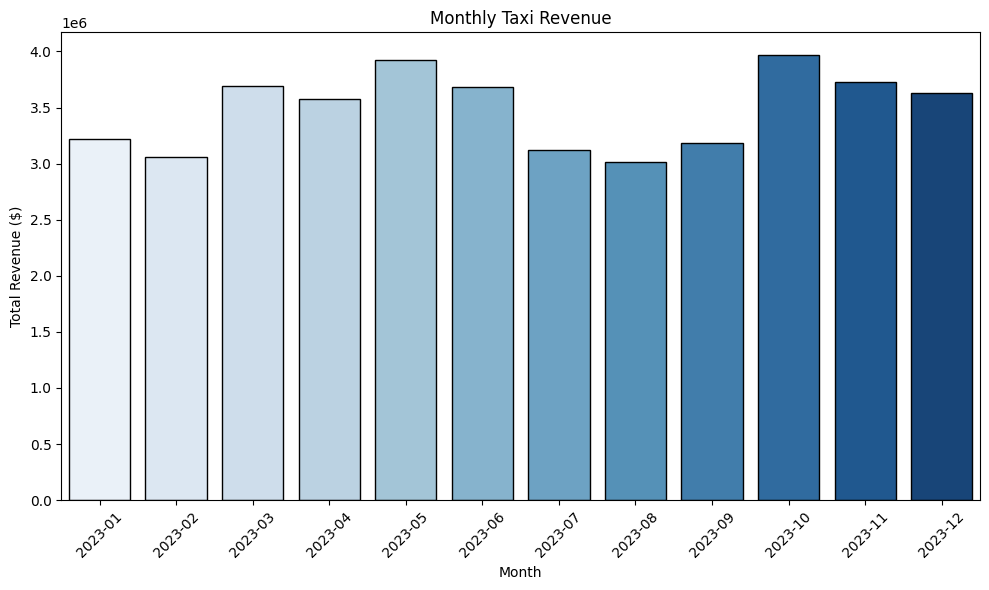

In [22]:
#Realising that there' revenue from 12-2022
#filter that out
monthly_filtered = monthly_revenue[monthly_revenue['month'] != '2022-12']
#visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_filtered, x='month', y='total_amount', palette='Blues', edgecolor='black')
plt.title("Monthly Taxi Revenue")
plt.xlabel("Month")
plt.ylabel("Total Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

  quarter  total_revenue  revenue_proportion (%)
0  2022Q4          13.50                0.000032
1  2023Q1     9966632.78               23.843512
2  2023Q2    11179929.43               26.746122
3  2023Q3     9323082.27               22.303924
4  2023Q4    11330530.34               27.106410


C:\Users\Administrator\AppData\Local\Temp\ipykernel_20776\3267218929.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=quarterly_filtered, x='quarter', y='revenue_proportion (%)', palette='Blues', edgecolor='black')


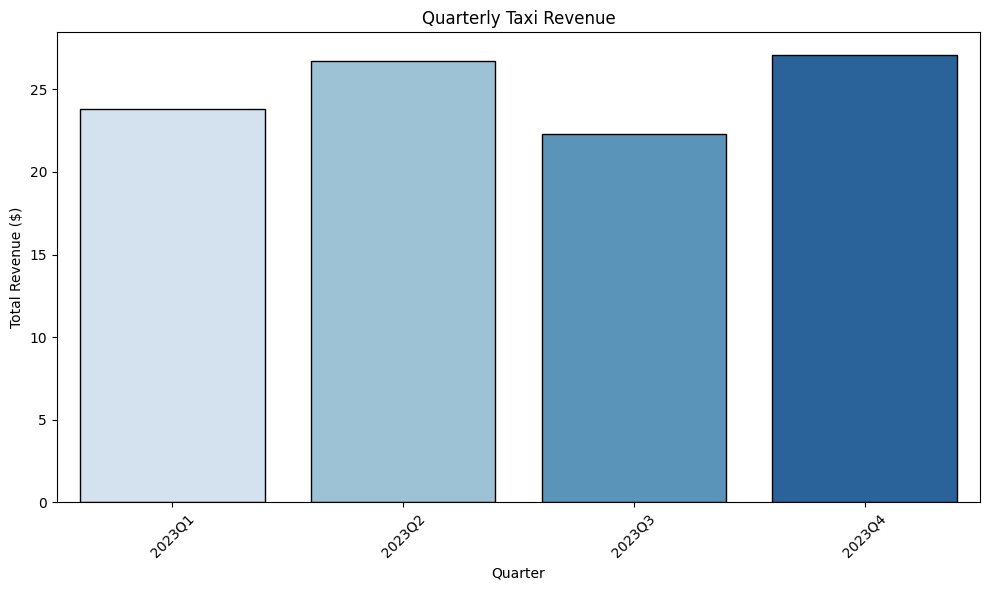

In [25]:
# Calculate proportion of each quarter
#Create a quarter column
cleaned_copy['quarter'] = cleaned_copy['tpep_pickup_datetime'].dt.to_period('Q')

#Analyse the quarterly revenue
quarterly_revenue = cleaned_copy.groupby('quarter')['total_amount'].sum().reset_index()
quarterly_revenue.columns = ['quarter', 'total_revenue']

#Analyse the proportional per quarter
total = quarterly_revenue['total_revenue'].sum()
quarterly_revenue['revenue_proportion (%)'] = quarterly_revenue['total_revenue']*100 / total

#output
print(quarterly_revenue)

#filter out
quarterly_filtered = quarterly_revenue[quarterly_revenue['quarter'] != '2022Q4']
#visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=quarterly_filtered, x='quarter', y='revenue_proportion (%)', palette='Blues', edgecolor='black')
plt.title("Quarterly Taxi Revenue")
plt.xlabel("Quarter")
plt.ylabel("Total Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

In [49]:
# Show how trip fare is affected by distance
#Filter Out Zero Distance Trips
data_filtered = cleaned_copy[cleaned_copy['trip_distance'] > 0].copy()

#Correlation analysis
correlation = data_filtered['trip_distance'].corr(data_filtered['fare_amount'])

#Plot a scatter plot: Scatter Plot of Trip Distance vs Fare Amount
plt.figure(figsize=(10, 6))
sns.regplot(
    x='trip_distance',
    y='fare_amount',
    data=data_filtered,
    scatter_kws={'alpha': 0.2},
    line_kws={'color': 'red'}
)

# Add title with correlation value
plt.title(f'Trip Distance vs Fare Amount\nCorrelation = {correlation:.2f}', fontsize=14)
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.xlim(0, 50)
plt.ylim(0, 200)
plt.grid(True)
plt.text(35, 20, f'r = {correlation:.2f}', fontsize=12, bbox=dict(facecolor='white', alpha=0.6))

plt.show()

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

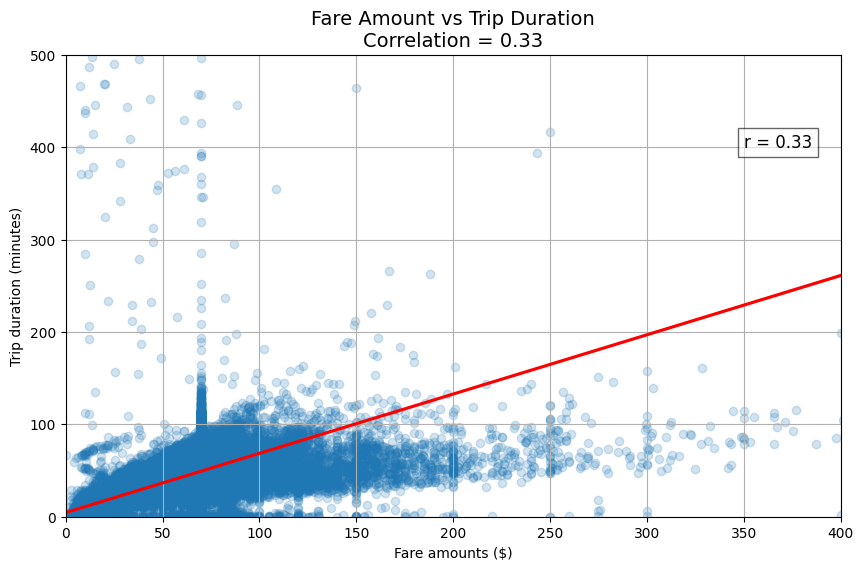

In [136]:
# Show relationship between fare and trip duration
#Correlation analysis
correlation1 = cleaned_copy['fare_amount'].corr(cleaned_copy['trip_duration'])

#Plot a regression scatter plot: Scatter Plot of Trip Duration vs Fare Amount
plt.figure(figsize=(10, 6))
sns.regplot(
    x='fare_amount',
    y='trip_duration',
    data=cleaned_copy,
    scatter_kws={'alpha': 0.2},
    line_kws={'color': 'red'}
)

# Add title with correlation value
plt.title(f'Fare Amount vs Trip Duration\nCorrelation = {correlation1:.2f}', fontsize=14)
plt.xlabel('Fare amounts ($)')
plt.ylabel('Trip duration (minutes)')
plt.xlim(0, 400)
plt.ylim(0, 500)
plt.grid(True)
plt.text(350, 400, f'r = {correlation1:.2f}', fontsize=12, bbox=dict(facecolor='white', alpha=0.6))

plt.show()

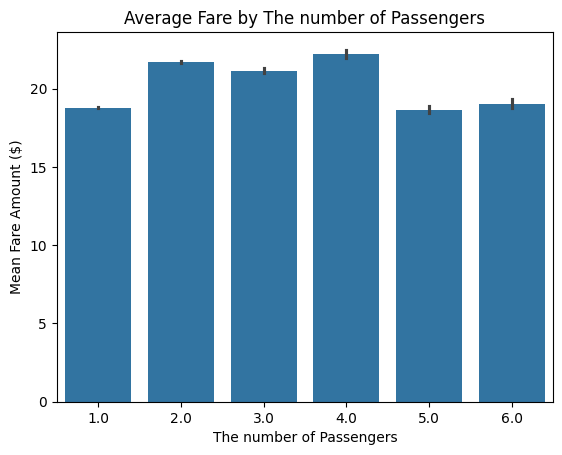

In [90]:
# Show relationship between fare and number of passengers
#Correlation analysis
correlation2 = cleaned_copy['fare_amount'].corr(cleaned_copy['passenger_count'])
print(correlation2)
#Plot a bar plot: The Average Fare by The number of Passengers
sns.barplot(
    x='passenger_count',
    y='fare_amount',
    data=cleaned_copy,
    estimator='mean'
)
plt.title("Average Fare by The number of Passengers") #title
plt.xlabel("The number of Passengers") #x axis label
plt.ylabel("Mean Fare Amount ($)") #y axis label
plt.show()

In [93]:
# Show relationship between tip and trip distance
#Correlation analysis
correlation3 = cleaned_copy['trip_distance'].corr(cleaned_copy['tip_amount'])

#Plot regression scatter plot between trip amount vs trip distance
plt.figure(figsize=(10, 6))
sns.regplot(
    x='trip_distance',
    y='tip_amount',
    data=cleaned_copy,
    scatter_kws={'alpha': 0.2},
    line_kws={'color': 'red'}
)
plt.title(f'Trip Distance vs Tip amount\nCorrelation = {correlation3:.2f}', fontsize=14) #Plot title
plt.xlabel('Trip Distance (miles)') #x axis label
plt.ylabel('Tip Amount ($)') #y axis label
plt.grid(True) #gridline
plt.text(30, 110, f'r = {correlation3:.2f}', fontsize=12, bbox=dict(facecolor='white', alpha=0.6))

plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

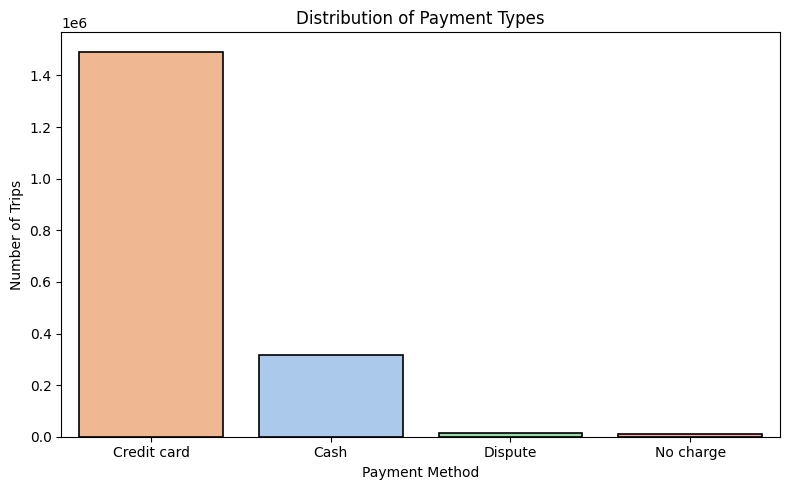

In [107]:
# Analyse the distribution of different payment types (payment_type).
#Mapping the payment methods
payment_mapping = {
    1: 'Credit card',
    2: 'Cash',
    3: 'No charge',
    4: 'Dispute'
}

data_cleaned['payment_label'] = data_cleaned['payment_type'].map(payment_mapping)
#Frequency Count
payment_counts = data_cleaned['payment_type'].value_counts()

#Percentage Distribution
payment_percent = round(payment_counts / payment_counts.sum() * 100, 2)

#Visualize with Bar Plot
plt.figure(figsize=(8, 5))
sns.countplot(x='payment_label', 
              data=data_cleaned, 
              order=data_cleaned['payment_label'].value_counts().index,
              hue='payment_label', #add color by the payment_type
              palette='pastel', #add color scheme as pastel
              edgecolor='black', # add black outline
              linewidth=1.2, # thickness of the outline
              legend=False)
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Method')
plt.ylabel('Number of Trips')
plt.xticks()
plt.tight_layout()
plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [ ]:
# !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [25]:
# import geopandas as gpd
# Read the shapefile using geopandas
zones = gpd.read_file(shapefile_path) # read the .shp file using gpd
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<Axes: >

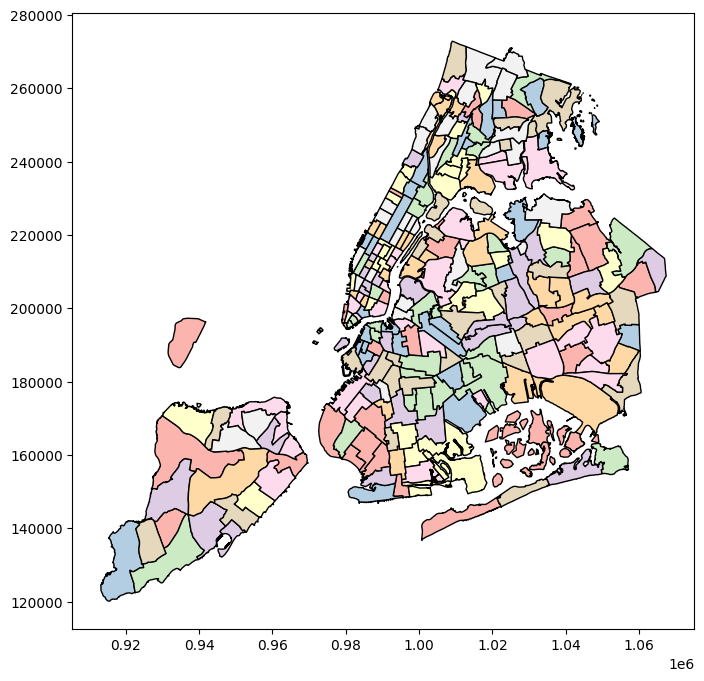

In [51]:
# print(zones.info())
zones.plot(cmap='Pastel1',        # or 'Pastel2', 'Set3', etc.
    edgecolor='black',
    legend=True,
    figsize=(10, 8))

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [ ]:
# Merge zones and trip records using locationID and PULocationID
data = data.merge(
    zones_gdf[['LocationID', 'zone', 'borough']].rename(columns={
        'LocationID': 'PULocationID',
        'zone': 'PUZone',
        'borough': 'PUBorough'
    }),
    on='PULocationID',
    how='left'
)

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [52]:
# Group data by location and calculate the number of trips
pickup_counts = data_cleaned.groupby('PULocationID').size().reset_index(name='pickup_trip_count')

#merge data frames
pickup_counts_named = pickup_counts.merge(
    zones[['LocationID', 'zone', 'borough']],
    left_on='PULocationID',
    right_on='LocationID',
    how='left'
)

pickup_counts_named = pickup_counts_named[['PULocationID', 'zone', 'borough', 'pickup_trip_count']]
#filter out the NA values
unknown_zones = pickup_counts_named[pickup_counts_named['zone'].isna()]
pickup_counts_named = pickup_counts_named.dropna(subset=['zone'])

print(pickup_counts_named)

     PULocationID                     zone        borough  pickup_trip_count
0               1           Newark Airport            EWR                214
1               2              Jamaica Bay         Queens                  2
2               3  Allerton/Pelham Gardens          Bronx                 40
3               4            Alphabet City      Manhattan               1862
4               5            Arden Heights  Staten Island                 13
..            ...                      ...            ...                ...
251           259       Woodlawn/Wakefield          Bronx                 47
252           260                 Woodside         Queens                361
253           261       World Trade Center      Manhattan               9609
254           262           Yorkville East      Manhattan              23617
255           263           Yorkville West      Manhattan              34875

[255 rows x 4 columns]


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [53]:
# Merge trip counts back to the zones GeoDataFrame
zones_trips = zones.merge(
    pickup_counts,
    left_on='LocationID',
    right_on='PULocationID',
    how='left'
)

# Fill missing trip counts with 0
zones_trips['pickup_trip_count'] = zones_trips['pickup_trip_count'].fillna(0)

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

In [123]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10)) #creates single a figure (fig) and a grid of subplot axes (ax),
                                                #with figure size 12 inches wide and 10 inches

# Plot the map and display it
zones_trips.plot(
    column='pickup_trip_count', #define the used variable for the plot
    cmap='YlOrRd', #define the colormap (color gradient)
    linewidth=0.6, #define the line width
    edgecolor='black', #define the edge color
    legend=True,
    legend_kwds={'label': "Number of Pickups"}, #adding label to the legend
    ax=ax #paste the pre-defined axis
)

ax.set_title('NYC Taxi Zones by Number of Pickups', fontsize=15)
ax.axis('off')  # Turn off geographic axis ticks
plt.tight_layout()
plt.show()

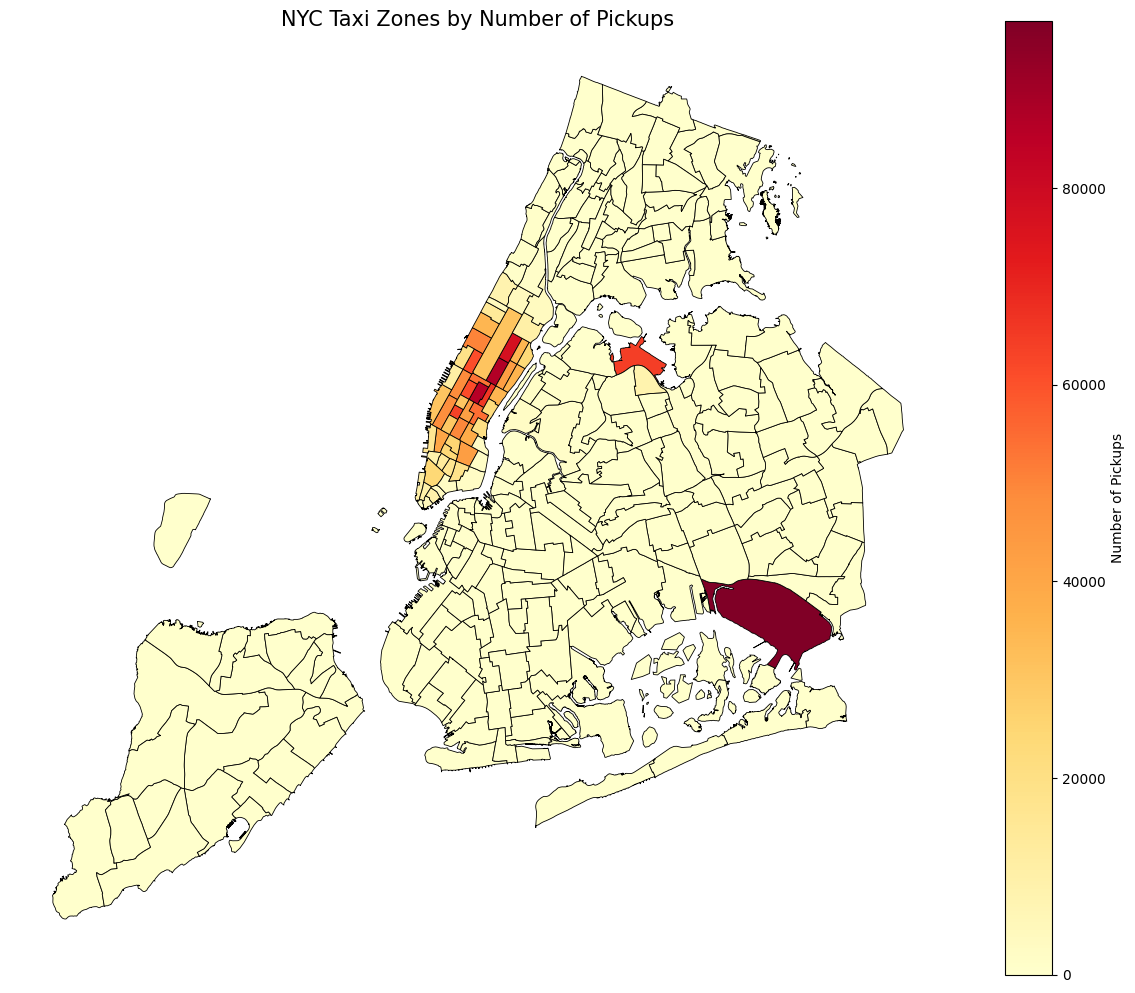

In [124]:
# can you try displaying the zones DF sorted by the number of trips?
zones_sorted = zones_trips.sort_values(by='pickup_trip_count', ascending=False)

# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10)) #creates single a figure (fig) and a grid of subplot axes (ax),
                                                #with figure size 12 inches wide and 10 inches

# Plot the map and display it
zones_sorted.plot(
    column='pickup_trip_count', #define the used variable for the plot
    cmap='YlOrRd', #define the colormap (color gradient)
    linewidth=0.6, #define the line width
    edgecolor='black', #define the edge color
    legend=True,
    legend_kwds={'label': "Number of Pickups"}, #adding label to the legend
    ax=ax #paste the pre-defined axis
)

ax.set_title('NYC Taxi Zones by Number of Pickups', fontsize=15)
ax.axis('off')  # Turn off geographic axis ticks
plt.tight_layout()
plt.show()

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [54]:
# Find routes which have the slowest speeds at different times of the day
#Group the data by Route and pickup hour (Zone+hour) and Calculate Average Speed
grouped_speed = cleaned_copy.groupby(
    ['PUZone', 'DOZone', 'hour']
).agg( #aggregate new variables into grouping speed DF
    avg_distance=('trip_distance', 'mean'), #calculate average distance traveled
    avg_duration_min=('trip_duration', 'mean'), #calculate average time traveled in minutes
    trip_count=('trip_distance', 'count') #calculate the total trip count
).reset_index() #reset the indexing

# Convert duration to hours and compute speed
grouped_speed['avg_duration_hr'] = grouped_speed['avg_duration_min'] / 60 #make new column of time traveled in hours
grouped_speed['avg_speed'] = grouped_speed['avg_distance'] / grouped_speed['avg_duration_hr'] #make new column of the average speed

# Find the slowest route per hour
slowest_per_hour = (
    grouped_speed.sort_values(['hour', 'avg_speed']) #sorting the value by hour and average speed
    .groupby('hour')
    .first()
    .reset_index()
)

#print the slowest route
print(slowest_per_hour[['hour', 'PUZone', 'DOZone','avg_distance','avg_duration_hr', 'avg_speed', 'trip_count']])

    hour                          PUZone                     DOZone  \
0      0                        Union Sq                  Hudson Sq   
1      1                Manhattan Valley               Bloomingdale   
2      2                     Murray Hill                  Hudson Sq   
3      3                 Lenox Hill East             Yorkville East   
4      4                    Midtown East               Midtown East   
5      5            TriBeCa/Civic Center        Crown Heights North   
6      6                   East Elmhurst          LaGuardia Airport   
7      7               Battery Park City                    Seaport   
8      8         Two Bridges/Seward Park               East Chelsea   
9      9                   Midtown North                   Kips Bay   
10    10                       Chinatown                  Chinatown   
11    11         Queensbridge/Ravenswood    Queensbridge/Ravenswood   
12    12         Greenwich Village North         DUMBO/Vinegar Hill   
13    

How does identifying high-traffic, high-demand routes help us?
Answer: To avoid the slow route at specific hours if you plan to travel

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

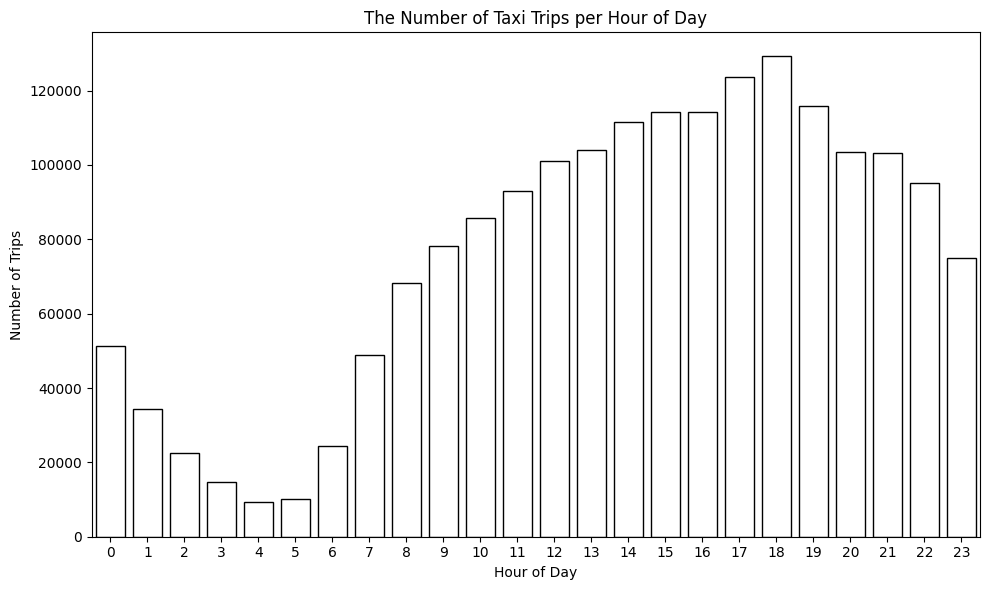

Busiest Hour: 18.0h with ~129,223 trips


In [151]:
# Visualise the number of trips per hour and find the busiest hour
#Count sampled trips per hour
hourly_trip_counts = data_cleaned.groupby('hour').size().reset_index(name='sampled_trip_count')

#Scale up to estimate total trips
hourly_trip_counts['estimated_total_trips'] = hourly_trip_counts['sampled_trip_count'] * (1/0.05)

#Identify Busiest Hour
busiest = hourly_trip_counts.loc[hourly_trip_counts['estimated_total_trips'].idxmax()]

#Visualize Trips per Hour
plt.figure(figsize=(10, 6))
sns.barplot(
    x='hour',
    y='sampled_trip_count',
    data=hourly_trip_counts,
    color='white',
    edgecolor='black'
)
plt.title("The Number of Taxi Trips per Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

print(f"Busiest Hour: {busiest['hour']}h with ~{int(busiest['sampled_trip_count']):,} trips")

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [55]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 1/0.05

#Count sampled trips per hour
hourly_trip_counts = data_cleaned.groupby('hour').size().reset_index(name='sampled_trip_count')

#Scale up to estimate total trips
hourly_trip_counts['estimated_total_trips'] = hourly_trip_counts['sampled_trip_count'] * sample_fraction

#Identify Busiest Hour
busiest = hourly_trip_counts.loc[hourly_trip_counts['estimated_total_trips'].idxmax()]

#5 hours that have busiest number of trips
hourly_trip_counts.sort_values(by='estimated_total_trips', ascending=False).head(5)

hour  sampled_trip_count  estimated_total_trips
18    18              129223              2584460.0
17    17              123609              2472180.0
19    19              115944              2318880.0
15    15              114338              2286760.0
16    16              114328              2286560.0

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [56]:
# Compare traffic trends for the week days and weekends
# Extract day of week (0 = Monday, ..., 6 = Sunday)
data_cleaned['day_of_week'] = data_cleaned['tpep_pickup_datetime'].dt.dayofweek

# Create 'week_type' column
data_cleaned['week_type'] = data_cleaned['day_of_week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

#Count Trips by Hour and Week Type
traffic_by_hour = data_cleaned.groupby(['week_type', 'hour']).size().reset_index(name='sampled_trip_count')

#Visualize the Comparison
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=traffic_by_hour,
    x='hour',
    y='sampled_trip_count',
    hue='week_type',
    marker='o'
)
plt.title("Hourly Traffic Trends: Weekdays vs Weekends")
plt.xlabel("Hour of Day")
plt.ylabel("The Number of Trips trending for Weekdays vs Weekends")
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

---Analyzing traffic trends across weekdays and weekends reveals distinct patterns—weekdays typically show pronounced morning and evening commute peaks, while weekends exhibit flatter distributions with increased evening and late-night activity. Identifying the busiest and quietest hours helps taxi operators and mobility services optimize driver allocation, apply dynamic pricing, plan maintenance during off-peak hours, and tailor marketing strategies. These insights lead to improved service efficiency, reduced operational costs, and better alignment of supply with passenger demand.

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

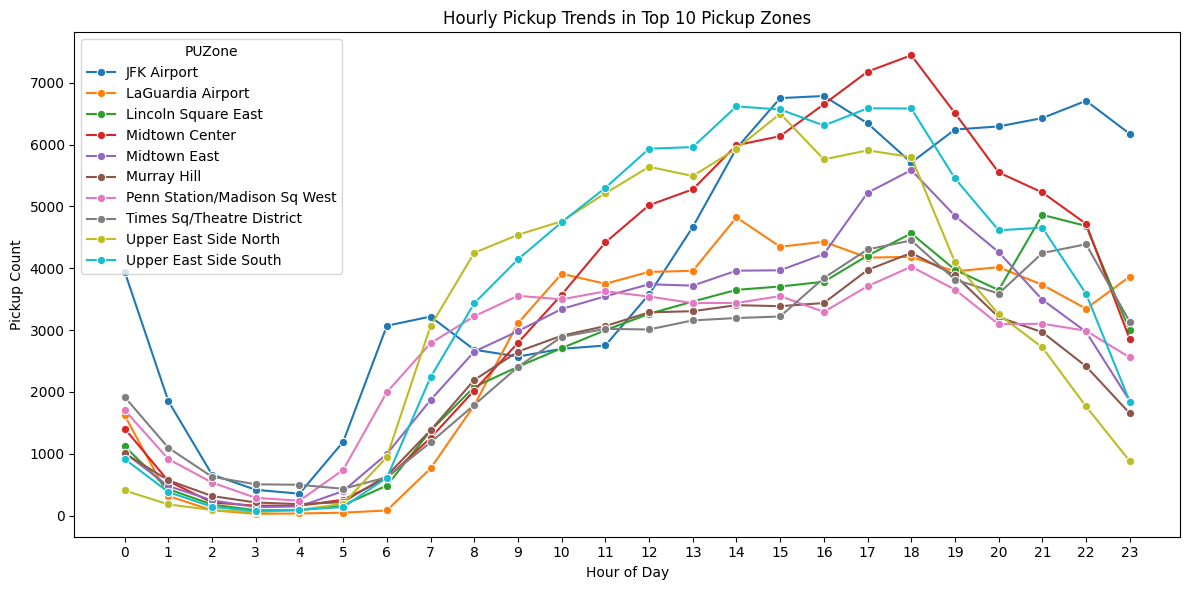

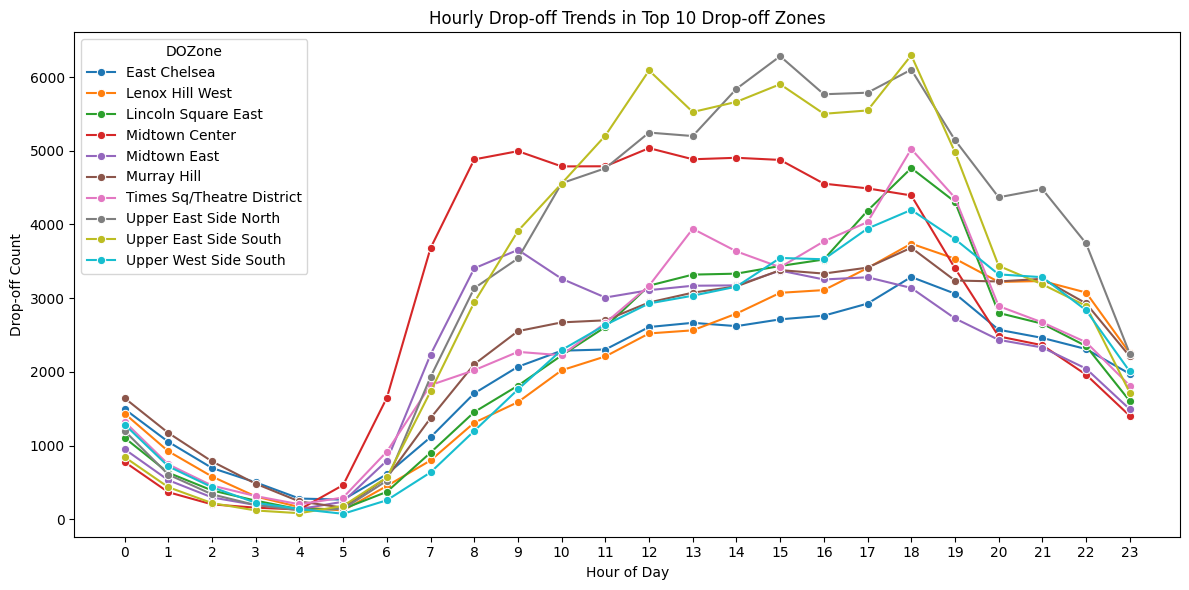

In [57]:
# Find top 10 pickup and dropoff zones
data_cleaned['dropoff_hour'] = data_cleaned['tpep_dropoff_datetime'].dt.hour
#Count Hourly Pickups and Drop-offs by Zone
pickup_hour = data_cleaned.groupby(['PUZone', 'hour']).size().reset_index(name='pickup_count')
dropoff_hour = data_cleaned.groupby(['DOZone', 'dropoff_hour']).size().reset_index(name='dropoff_count')

#Aggregate Total Pickups and Drop-offs per Zone
pickup_totals = pickup_hour.groupby('PUZone')['pickup_count'].sum().reset_index()
dropoff_totals = dropoff_hour.groupby('DOZone')['dropoff_count'].sum().reset_index()

top10_pickup_zones = pickup_totals.sort_values(by='pickup_count', ascending=False).head(10)['PUZone'].tolist()
top10_dropoff_zones = dropoff_totals.sort_values(by='dropoff_count', ascending=False).head(10)['DOZone'].tolist()

#Filter Data for Top Zones
pickup_top10 = pickup_hour[pickup_hour['PUZone'].isin(top10_pickup_zones)]
dropoff_top10 = dropoff_hour[dropoff_hour['DOZone'].isin(top10_dropoff_zones)]

#Visualize Pickup and Dropoff Trends
# Pickup Trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=pickup_top10, x='hour', y='pickup_count', hue='PUZone', marker='o')
plt.title("Hourly Pickup Trends in Top 10 Pickup Zones")
plt.xlabel("Hour of Day")
plt.ylabel("Pickup Count")
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

# Dropoff Trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=dropoff_top10, x='dropoff_hour', y='dropoff_count', hue='DOZone', marker='o')
plt.title("Hourly Drop-off Trends in Top 10 Drop-off Zones")
plt.xlabel("Hour of Day")
plt.ylabel("Drop-off Count")
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [58]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
#Count Total Pickups and Drop-offs per Zone
count_PU = data_cleaned.groupby('PUZone').size().reset_index(name='pickup_count')
count_DO = data_cleaned.groupby('DOZone').size().reset_index(name='dropoff_count')

# Merge on zone name
zone_counts = pd.merge(
    count_PU, count_DO,
    left_on='PUZone', right_on='DOZone',
    how='outer'
)

# Create unified zone name column
zone_counts['Zone'] = zone_counts['PUZone'].combine_first(zone_counts['DOZone'])

# Keep relevant columns
zone_counts = zone_counts[['Zone', 'pickup_count', 'dropoff_count']]

# Compute ratio (avoid division by zero)
zone_counts['pickup_dropoff_ratio'] = zone_counts['pickup_count'] / zone_counts['dropoff_count'].replace(0, 1)

# Get top and bottom 10 zones by ratio
top10 = zone_counts.sort_values(by='pickup_dropoff_ratio', ascending=False).head(10)
bottom10 = zone_counts.sort_values(by='pickup_dropoff_ratio').head(10)

# Outcomes
print("Top 10 Pickup/Dropoff Ratio Zones:")
print(top10)

print("\nBottom 10 Pickup/Dropoff Ratio Zones:")
print(bottom10)

Top 10 Pickup/Dropoff Ratio Zones:
                             Zone  pickup_count  dropoff_count  \
67                  East Elmhurst        8366.0         1004.0   
122                   JFK Airport       97017.0        20970.0   
132             LaGuardia Airport       64280.0        22249.0   
181  Penn Station/Madison Sq West       63480.0        40117.0   
107       Greenwich Village South       24118.0        17540.0   
41                   Central Park       30753.0        22369.0   
244                  West Village       40409.0        30468.0   
156                  Midtown East       65638.0        52250.0   
155                Midtown Center       85955.0        71648.0   
97               Garment District       30213.0        25345.0   

     pickup_dropoff_ratio  
67               8.332669  
122              4.626466  
132              2.889119  
181              1.582372  
107              1.375029  
41               1.374804  
244              1.326277  
156           

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [59]:
#During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
# Define night hours: 11 PM (23) to 5 AM (5)
night_data = data_cleaned[
    (data_cleaned['hour'] >= 23) | (data_cleaned['dropoff_hour'] <= 5)
]

# Count pickups and dropoffs during night hours
night_pickups = night_data.groupby('PUZone').size().reset_index(name='night_pickup_count')
night_dropoffs = night_data.groupby('DOZone').size().reset_index(name='night_dropoff_count')

# Sort and get top 10
top10_night_pickups = night_pickups.sort_values(by='night_pickup_count', ascending=False).head(10)
top10_night_dropoffs = night_dropoffs.sort_values(by='night_dropoff_count', ascending=False).head(10)

# Display results
print("Top 10 Pickup Zones During Night Hours (11PM–5AM):")
print(top10_night_pickups)

print("\nTop 10 Dropoff Zones During Night Hours (11PM–5AM):")
print(top10_night_dropoffs)

Top 10 Pickup Zones During Night Hours (11PM–5AM):
                           PUZone  night_pickup_count
71                   East Village               15529
110                   JFK Airport               14028
221                  West Village               12457
42                   Clinton East               10311
129               Lower East Side                9610
98        Greenwich Village South                8745
203     Times Sq/Theatre District                8070
162  Penn Station/Madison Sq West                6818
143                 Midtown South                6102
60                   East Chelsea                6014

Top 10 Dropoff Zones During Night Hours (11PM–5AM):
                        DOZone  night_dropoff_count
76                East Village                 8298
46                Clinton East                 6830
163                Murray Hill                 6237
65                East Chelsea                 5802
101                   Gramercy            

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [9]:
# Filter for night hours (11 PM to 5 AM)
night_hours = data_cleaned[
    (data_cleaned['hour'] >= 23) | (data_cleaned['hour'] <= 5)
].copy()

In [10]:
#Compute the revenue share
night_revenue = night_hours['total_amount'].sum()
total_revenue = data_cleaned['total_amount'].sum()

night_share = (night_revenue / total_revenue) * 100
day_share = 100 - night_share

print(f"🌙 Nighttime Revenue Share: {night_share:.2f}%")
print(f"☀️ Daytime Revenue Share: {day_share:.2f}%")

🌙 Nighttime Revenue Share: 12.07%
☀️ Daytime Revenue Share: 87.93%


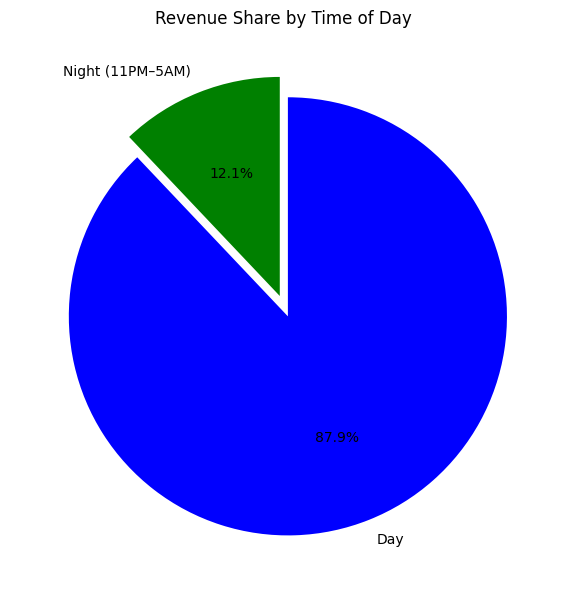

In [12]:
#Visualization
plt.figure(figsize=(6, 6))
plt.pie(
    [night_share, day_share],
    labels=['Night (11PM–5AM)', 'Day'],
    autopct='%1.1f%%',
    colors=['Green', 'Blue'],
    startangle=90,
    explode=[0.05, 0.05]
)
plt.title("Revenue Share by Time of Day")
plt.tight_layout()
plt.show()

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [8]:
# Analyse the fare per mile per passenger for different passenger counts
# Group by passenger count
grouped_fare = data_cleaned.groupby('passenger_count').agg(
    total_fare_amount=('fare_amount', 'sum'),
    total_trip_distance=('trip_distance', 'sum')).reset_index()
# Calculate
grouped_fare['avg_fare_per_passenger']=grouped_fare['total_fare_amount']/grouped_fare['total_trip_distance']

print(grouped_fare)

   passenger_count  total_fare_amount  total_trip_distance  \
0              1.0        26975785.32           4630430.74   
1              2.0         6159111.43           1125861.88   
2              3.0         1513257.53            267878.42   
3              4.0          913868.81            157158.28   
4              5.0          450415.20             79104.40   
5              6.0          302335.05             52958.26   

   avg_fare_per_passenger  
0                5.825762  
1                5.470575  
2                5.649046  
3                5.814958  
4                5.693934  
5                5.708931  


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [82]:
# Compare the average fare per mile for different days and for different times of the day
#Group data
fare_data=data_cleaned.groupby(['day_of_week','hour']).agg(
    fare_amount=('fare_amount','sum'),
    trip_distance=('trip_distance','sum'),
    trip_count=('trip_distance','count')).reset_index()
    
#Calculate the fare_per_mile
fare_data['avg_fare_per_mile']=fare_data['fare_amount']/fare_data['trip_distance']

# Define mapping from number to day name
day_map = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}
# Apply mapping
fare_data['day_name'] = fare_data['day_of_week'].map(day_map)

#Visualize Trends of average fare for each hour of the day and each day of the week
plt.figure(figsize=(12, 6))
sns.lineplot(data=fare_data, x='hour', y='avg_fare_per_mile', hue='day_name', marker='o')
plt.title("Trends of average fare for each hour of the day and each day of the week")
plt.xlabel("Hours of the day")
plt.ylabel("Fare amount")
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

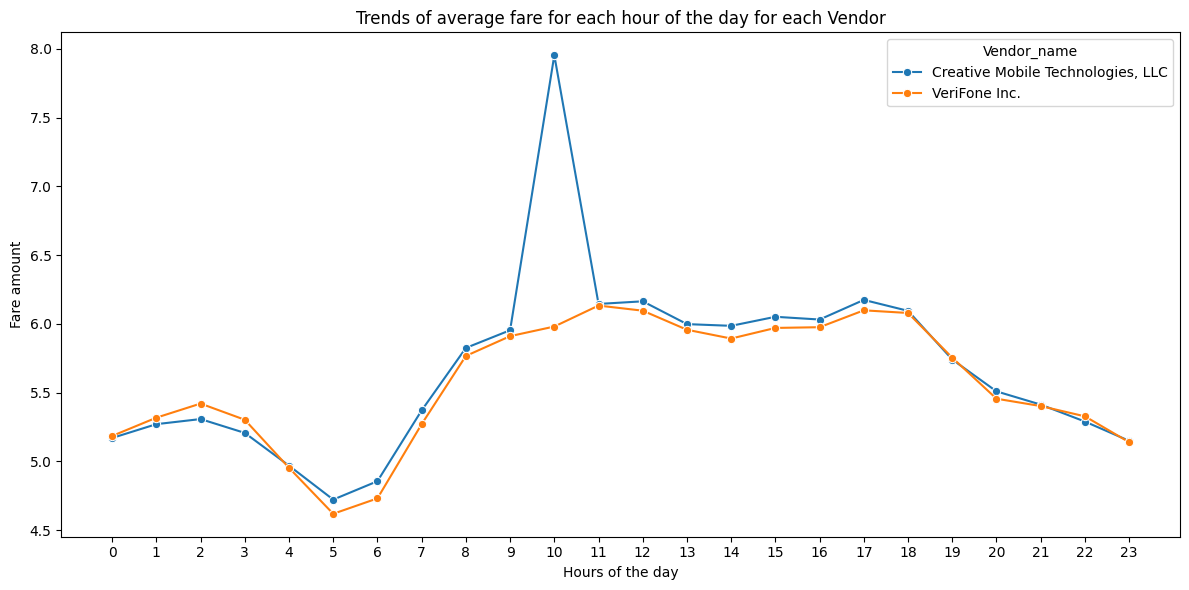

In [86]:
# Compare fare per mile for different vendors
#Group data
vendor_fare_data=data_cleaned.groupby(['VendorID','hour']).agg(
    fare_amount=('fare_amount','sum'),
    trip_distance=('trip_distance','sum'),
    trip_count=('trip_distance','count')).reset_index()
    
#Calculate the fare_per_mile
vendor_fare_data['avg_fare_per_mile']=vendor_fare_data['fare_amount']/vendor_fare_data['trip_distance']

# Define mapping from number to day name
vendor_map = {
    1: 'Creative Mobile Technologies, LLC',
    2: 'VeriFone Inc.'
}
# Apply mapping
vendor_fare_data['Vendor_name'] = vendor_fare_data['VendorID'].map(vendor_map)

#Visualize Trends of average fare for each hour of the day and for each Vendor
plt.figure(figsize=(12, 6))
sns.lineplot(data=vendor_fare_data, x='hour', y='avg_fare_per_mile', hue='Vendor_name', marker='o')
plt.title("Trends of average fare for each hour of the day for each Vendor")
plt.xlabel("Hours of the day")
plt.ylabel("Fare amount")
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [99]:
# Defining distance tiers
bins = [0, 2, 5, float('inf')]
labels = ['Low', 'Mid', 'High']

# Apply binning
vendor_fare_data['fare_tiers'] = pd.cut(
    vendor_fare_data['avg_fare_per_mile'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

vendor_fare_data.head()

VendorID  hour  fare_amount  trip_distance  trip_count  avg_fare_per_mile  \
0         1     0    219226.33        42407.0       11629           5.169579   
1         1     1    139748.28        26517.3        7838           5.270080   
2         1     2     85578.09        16125.1        5278           5.307135   
3         1     3     60076.70        11538.9        3394           5.206449   
4         1     4     55996.05        11270.7        2411           4.968285   

                         Vendor_name fare_tiers  
0  Creative Mobile Technologies, LLC       High  
1  Creative Mobile Technologies, LLC       High  
2  Creative Mobile Technologies, LLC       High  
3  Creative Mobile Technologies, LLC       High  
4  Creative Mobile Technologies, LLC        Mid

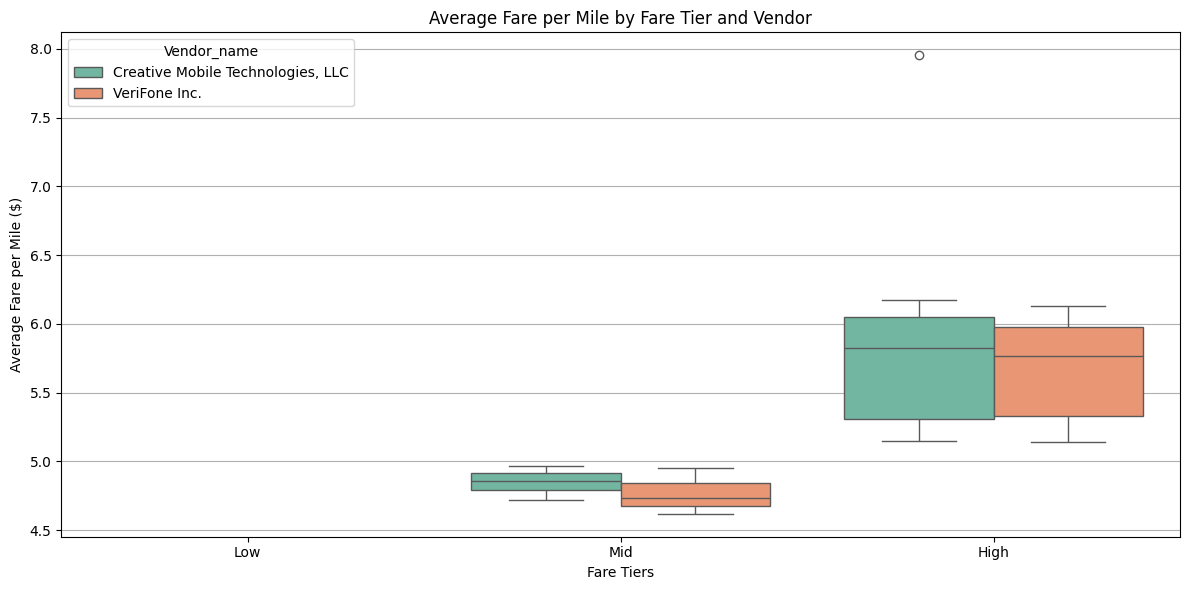

In [90]:
#Comparing the fare rates of different vendors by using boxplot visualization
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=vendor_fare_data,
    x='fare_tiers',
    y='avg_fare_per_mile',
    hue='Vendor_name',
    palette='Set2',
    showfliers=True  # show outliers
)

plt.title("Average Fare per Mile by Fare Tier and Vendor")
plt.xlabel("Fare Tiers")
plt.ylabel("Average Fare per Mile ($)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

    distance_group  passenger_count  hour  tips_percentage
77              Q1              4.0     5        12.688270
223             Q2              4.0     7        12.989076
226             Q2              4.0    10        13.514124
374             Q3              4.0    14        13.753920
76              Q1              4.0     4        13.811728
377             Q3              4.0    17        14.096171
225             Q2              4.0     9        14.490264
78              Q1              4.0     6        14.495475
198             Q2              3.0     6        14.518508
373             Q3              4.0    13        14.742722


C:\Users\Administrator\AppData\Local\Temp\ipykernel_12468\2786575624.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tip_summary = tips_data.groupby(
C:\Users\Administrator\AppData\Local\Temp\ipykernel_12468\2786575624.py:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\Administrator\AppData\Local\Temp\ipykernel_12468\2786575624.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


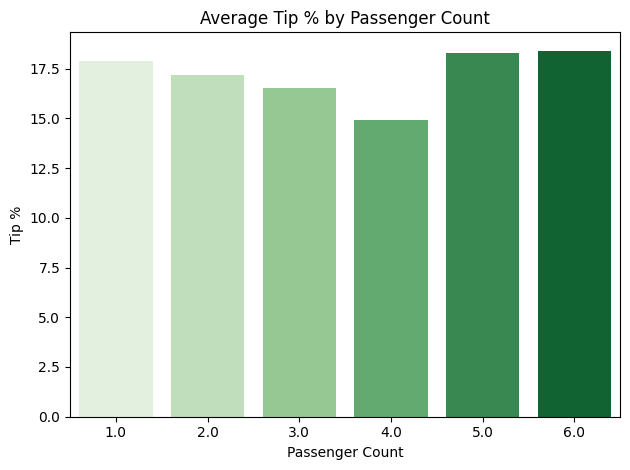

In [128]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
#Group data
tips_data=data_cleaned.groupby(['passenger_count','hour']).agg(
    tip_amount=('tip_amount','sum'),
    fare_amount=('fare_amount','sum'),
    trip_distance=('trip_distance','sum')).reset_index()
    
#Calculate the fare_per_mile
tips_data['tips_percentage']=tips_data['tip_amount']*100/tips_data['fare_amount']
#Group trip_distance into 4 percentile groups
tips_data['distance_group']= pd.qcut(
    tips_data['trip_distance'],
    q=4,
    labels=['Q1', 'Q2', 'Q3', 'Q4']
)

#summarize the data according to the distance group
tip_summary = tips_data.groupby(
    ['distance_group', 'passenger_count', 'hour']
)['tips_percentage'].mean().reset_index()

print(tip_summary.sort_values(by='tips_percentage', ascending=True).head(10))

#Visualize the tip percentage by the number of passenger count
sns.barplot(
    data=tips_data,
    x='passenger_count',
    y='tips_percentage',
    estimator='mean',
    ci=None,
    palette='Greens'
)
plt.title("Average Tip % by Passenger Count")
plt.ylabel("Tip %")
plt.xlabel("Passenger Count")
plt.tight_layout()
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [148]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
data_cleaned['tips_percentage']=data_cleaned['tip_amount']*100/data_cleaned['fare_amount']

data_cleaned['tip_tiers'] = pd.cut(
    data_cleaned['tips_percentage'],
    bins=[-1, 10, 25, 100],
    labels=['<10%', '10–25%', '>25%']
)

# Filter out the 10-25% tier
tips_additional=data_cleaned[data_cleaned['tip_tiers'].isin(['<10%', '>25%'])]

# Compute average distance per tip tier
avg_distance_by_tier = tips_additional.groupby('tip_tiers')['trip_distance'].mean().reset_index()

#Visualize the trip distance by the tip percentage groups
sns.barplot(
    data=avg_distance_by_tier,
    x='tip_tiers',
    y='trip_distance',
    estimator='mean',
    errorbar='sd',
    order=['<10%', '>25%'], #show only <10 and >25 groups on the graph
    edgecolor='black'
)
plt.title("Trip distances in Different tip percentage groups")
plt.ylabel("Traveled distances (mile)")
plt.xlabel("Tip tiers")
plt.tight_layout()
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12468\3568319862.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_distance_by_tier = tips_additional.groupby('tip_tiers')['trip_distance'].mean().reset_index()


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

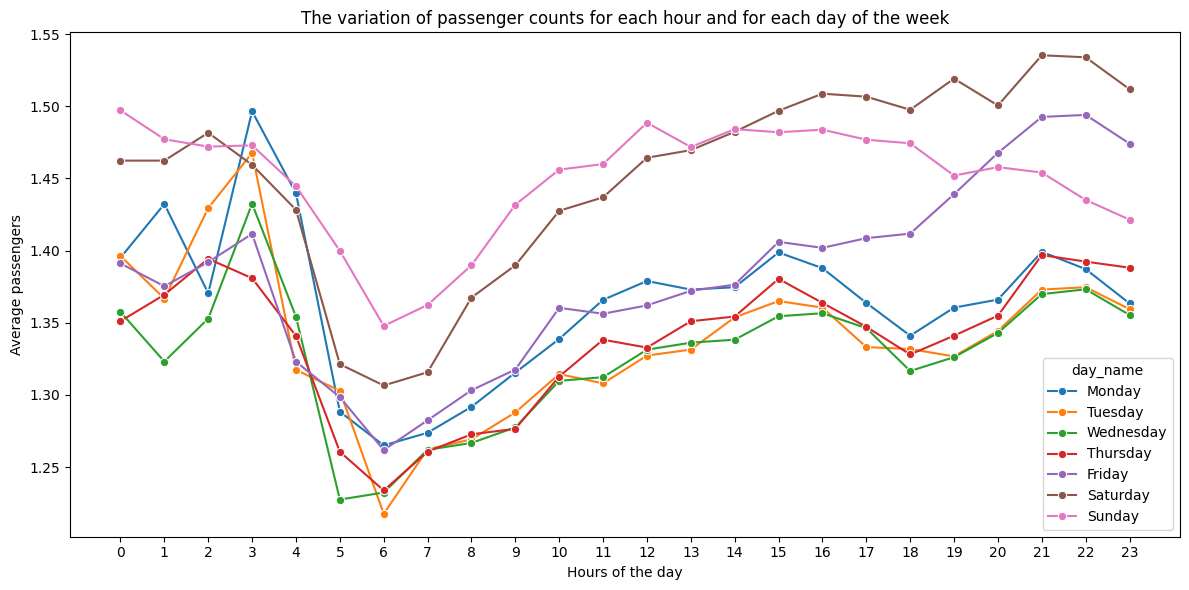

In [158]:
# See how passenger count varies across hours and days
#Group data
passenger_data=data_cleaned.groupby(['day_of_week','hour']).agg(
    fare_amount=('fare_amount','sum'),
    trip_distance=('trip_distance','sum'),
    trip_count=('trip_distance','count'),
    passenger_count=('passenger_count','mean')).reset_index()
    
# Define mapping from number to day name
day_map = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}
# Apply mapping
passenger_data['day_name'] = passenger_data['day_of_week'].map(day_map)

#Visualize the variation of passenger counts for each hour and for each day of the week
plt.figure(figsize=(12, 6))
sns.lineplot(data=passenger_data, x='hour', y='passenger_count', hue='day_name', marker='o')
plt.title("The variation of passenger counts for each hour and for each day of the week")
plt.xlabel("Hours of the day")
plt.ylabel("Average passengers")
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [38]:
# How does passenger count vary across zones
passenger_zones_data = data_cleaned.groupby('PUZone').agg(
    passenger_count=('passenger_count','sum')
).reset_index()

passenger_zones_data['passenger_count']=passenger_zones_data['passenger_count'].astype(int) #change the passenger count to int type
passenger_zones_data = passenger_zones_data.sort_values(by='passenger_count', ascending=True) #sort the value of passenger counts
passenger_zones_data

PUZone  passenger_count
24   Breezy Point/Fort Tilden/Riis Beach                1
79     Eltingville/Annadale/Prince's Bay                1
105                  Grymes Hill/Clifton                1
163               New Dorp/Midland Beach                1
212                            Stapleton                1
..                                   ...              ...
221            Times Sq/Theatre District            91639
227                Upper East Side North           104193
228                Upper East Side South           116586
152                       Midtown Center           119620
119                          JFK Airport           145446

[254 rows x 2 columns]

In [107]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
# Group data by location and calculate the number of trips
passenger_zones = data_cleaned.groupby('PULocationID').agg(
    passenger_count=('passenger_count','mean')
).reset_index()

# #merge data frames
passenger_zones_trip = zones.merge(
    passenger_zones,
    right_on='PULocationID',
    left_on='LocationID',
    how='left'
)
#fill NA zones with 0s
passenger_zones_trip['passenger_count'] = passenger_zones_trip['passenger_count'].fillna(0)

# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot the map and display variation of passengers among zones
passenger_zones_trip.plot(
    column='passenger_count', #define the used variable for the plot
    cmap='PuOr', #define the colormap Purple to Orange (color gradient)
    linewidth=0.6, #define the line width
    edgecolor='black', #define the edge color
    legend=True,
    legend_kwds={'label': "Average number of passengers"}, #adding label to the legend
    ax=ax #paste the pre-defined axis
)

ax.set_title('NYC Taxi Zones by Average number of passengers', fontsize=15)
ax.axis('off')
plt.tight_layout()
plt.show()

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [64]:
#See the columns that could relate to extra charges
print(data_cleaned.columns.tolist())

['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee', 'date', 'hour', 'PUZone', 'PUBorough', 'DOZone', 'DOBorough']


                       applied_count  applied_percent
Improvement Surcharge        1831303        99.959499
MTA Tax                      1814935        99.066071
Congestion Surcharge         1690711        92.285452
Extra Charge                 1134777        61.940455
Airport Fee                   161232         8.800657


C:\Users\Administrator\AppData\Local\Temp\ipykernel_16396\398449488.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=surcharge_data.index, y='applied_percent', data=surcharge_data, palette='crest', edgecolor='black')


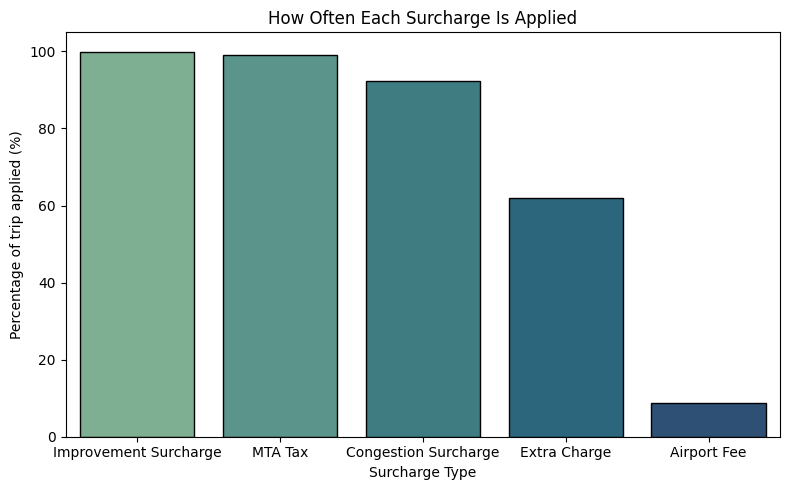

In [75]:
# How often is each surcharge applied?
surcharge_relates = [
    'extra',
    'mta_tax',
    'improvement_surcharge',
    'congestion_surcharge',
    'airport_fee'
]

# Count how many times each surcharge is applied (value > 0)
surcharge_counts = {
    col: (data_cleaned[col] > 0).sum() for col in surcharge_relates
}

# Convert to DataFrame
surcharge_data = pd.DataFrame.from_dict(surcharge_counts, orient='index', columns=['applied_count'])
surcharge_data['applied_percent'] = (surcharge_data['applied_count'] / len(data_cleaned)) * 100
surcharge_data = surcharge_data.sort_values(by='applied_count', ascending=False)
#Renames
surcharge_data.rename(index={
    'improvement_surcharge': 'Improvement Surcharge',
    'mta_tax': 'MTA Tax',
    'congestion_surcharge': 'Congestion Surcharge',
    'extra': 'Extra Charge',
    'airport_fee': 'Airport Fee'
}, inplace=True)

print(surcharge_data)

#Visualization
plt.figure(figsize=(8, 5))
sns.barplot(x=surcharge_data.index, y='applied_percent', data=surcharge_data, palette='crest', edgecolor='black')
plt.title("How Often Each Surcharge Is Applied")
plt.ylabel("Percentage of trip applied (%)")
plt.xlabel("Surcharge Type")
plt.tight_layout()
plt.show()

In [79]:
#Analyze Zones Where Surcharges Are Applied
#Airport fee by pickup zone
airport_zone_counts = data_cleaned[data_cleaned['airport_fee'] > 0].groupby('PUZone').size().reset_index(name='count')
airport_zone_counts = airport_zone_counts.sort_values(by='count', ascending=False)
print("Pickup zones with highest airport fee usage:")
print(airport_zone_counts.head(10))

#Airport fee by dropoff zone
airport_do_zone_counts = data_cleaned[data_cleaned['airport_fee'] > 0].groupby('DOZone').size().reset_index(name='count')
airport_do_zone_counts = airport_do_zone_counts.sort_values(by='count', ascending=False)
print("Dropoff zones with highest airport fee usage:")
print(airport_do_zone_counts.head(10))

Pickup zones with highest airport fee usage:
                            PUZone  count
45                     JFK Airport  90580
51               LaGuardia Airport  63209
24                   East Elmhurst   5571
0                                    1244
3                     Baisley Park     55
37    Flushing Meadows-Corona Park     34
94       Times Sq/Theatre District     33
71                     Murray Hill     32
46                 Jackson Heights     28
57  Long Island City/Hunters Point     22
Dropoff zones with highest airport fee usage:
                        DOZone  count
223  Times Sq/Theatre District   8421
0                                5177
154             Midtown Center   4650
157              Midtown South   4263
121                JFK Airport   4236
46                Clinton East   4067
155               Midtown East   3621
156              Midtown North   3568
163                Murray Hill   3457
65                East Chelsea   3025


C:\Users\Administrator\AppData\Local\Temp\ipykernel_16396\3430692111.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hour', y='percent', data=extra_hour, palette='crest', edgecolor='black')


C:\Users\Administrator\AppData\Local\Temp\ipykernel_16396\3430692111.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='dropoff_hour', y='percent', data=extra_do_hour, palette='magma', edgecolor='black')


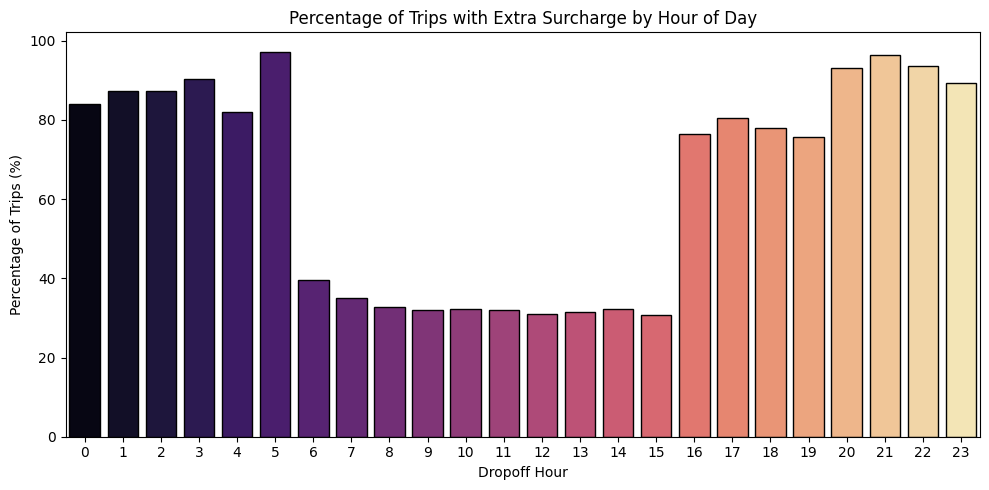

In [85]:
#PU hour extra charges
extra_hour = data_cleaned[data_cleaned['extra'] > 0].groupby('hour').size().reset_index(name='extra_count')
extra_hour['percent'] = extra_hour['extra_count'] / data_cleaned.groupby('hour').size().values * 100

#DO hour extra charges
data_cleaned['tpep_dropoff_datetime']=pd.to_datetime(data_cleaned['tpep_dropoff_datetime'])
data_cleaned['dropoff_hour']=data_cleaned['tpep_dropoff_datetime'].dt.hour
extra_do_hour = data_cleaned[data_cleaned['extra'] > 0].groupby('dropoff_hour').size().reset_index(name='extra_count')
extra_do_hour['percent'] = extra_hour['extra_count'] / data_cleaned.groupby('dropoff_hour').size().values * 100

#Visualize
plt.figure(figsize=(10, 5))
sns.barplot(x='hour', y='percent', data=extra_hour, palette='crest', edgecolor='black')
plt.title("Percentage of Trips with Extra Surcharge by Hour of Day")
plt.ylabel("Percentage of Trips (%)")
plt.xlabel("Pickup Hour")
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x='dropoff_hour', y='percent', data=extra_do_hour, palette='magma', edgecolor='black')
plt.title("Percentage of Trips with Extra Surcharge by Hour of Day")
plt.ylabel("Percentage of Trips (%)")
plt.xlabel("Dropoff Hour")
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

To improve operational efficiency, cab dispatching must be dynamically adjusted based on **hourly and daily demand peaks**. For instance, more cabs should be directed to **Manhattan and JFK/LGA airports** during early morning hours (5-9 AM) and in the evenings (4-8 PM) on weekdays. During weekends, the emphasis should shift to entertainment districts during **late-night hours (10 PM-2 AM)** to cater to nightlife activities and fill service gaps. Dispatch algorithms should also take into account **historical zone-level passenger count patterns** to avoid having too many cabs in low-demand areas and not enough in high-demand locations.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

The choropleth analyses clearly pinpoint areas with consistently high trip volumes, including Midtown East, the World Trade Center, and airports. Taxis should be strategically stationed in or around these regions during expected peak demand times to decrease passenger wait times and enhance trip success rates. Moreover, spots that demonstrate a significant average number of passengers per ride, such as airports and stadiums, should be prioritized during event times or surges in flight activity. On the other hand, areas with infrequent pickups but substantial drop-off numbers might be suitable for reverse-routing, enabling cabs to seize return trips and lessen deadhead mileage.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

The findings regarding tip behavior, fare efficiency, and surcharge distribution support a more refined approach to pricing policies based on data. For example, implementing mild surge pricing during peak weekday hours in areas with high congestion can help maximize revenue while effectively managing demand. Additionally, nighttime trips, which often benefit from extra surcharges, could be encouraged through flat-rate offers or loyalty rewards, promoting ridesharing and off-peak travel. Furthermore, analyzing trip trends by distance and fare per mile supports a tiered pricing structure. This structure would provide competitive base rates for short trips and discounted incremental rates for longer journeys, ensuring that we remain attractive compared to ride-hailing competitors.